In [32]:
# %pip install wordcloud

In [31]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
import wordcloud

import warnings
from collections import Counter
import datetime
import json
# Hiding warnings for cleaner display
warnings.filterwarnings('ignore')
# Configuring some options
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# If you want interactive plots, uncomment the next line
%matplotlib notebook
PLOT_COLORS = ["#268bd2", "#0052CC", "#FF5722", "#b58900", "#003f5c"]
pd.options.display.float_format = '{:.2f}'.format
sns.set(style="ticks")
plt.rc('figure', figsize=(8, 5), dpi=100)
plt.rc('axes', labelpad=20, facecolor="#ffffff", linewidth=0.4, grid=True, labelsize=14)
plt.rc('patch', linewidth=0)
plt.rc('xtick.major', width=0.2)
plt.rc('ytick.major', width=0.2)
plt.rc('grid', color='#9E9E9E', linewidth=0.4)
plt.rc('font', family='Arial', weight='400', size=10)
plt.rc('text', color='#282828')
plt.rc('savefig', pad_inches=0.3, dpi=300)

In [45]:
# df = pd.read_csv('/Users/zhujinghong/5003/project/CA.csv/CA_pre.csv')
df = pd.read_csv('/Users/zhujinghong/Downloads/5003 project/data/CAvideos.csv')

In [46]:
df.head()

video_id trending_date  \
0  n1WpP7iowLc      17.14.11   
1  0dBIkQ4Mz1M      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  d380meD0W0M      17.14.11   
4  2Vv-BfVoq4g      17.14.11   

                                               title channel_title  \
0         Eminem - Walk On Water (Audio) ft. Beyoncé    EminemVEVO   
1                      PLUSH - Bad Unboxing Fan Mail     iDubbbzTV   
2  Racist Superman | Rudy Mancuso, King Bach & Le...  Rudy Mancuso   
3                           I Dare You: GOING BALD!?      nigahiga   
4        Ed Sheeran - Perfect (Official Music Video)    Ed Sheeran   

   category_id              publish_time  \
0           10  2017-11-10T17:00:03.000Z   
1           23  2017-11-13T17:00:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-12T18:01:41.000Z   
4           10  2017-11-09T11:04:14.000Z   

                                                tags     views    likes  \
0  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579   787425   
1  plush|"bad unboxing"|"unboxing"|"fan mail"|"id...   1014651   127794   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...   3191434   146035   
3  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...   2095828   132239   
4  edsheeran|"ed sheeran"|"acoustic"|"live"|"cove...  33523622  1634130   

   dislikes  comment_count                                  thumbnail_link  \
0     43420         125882  https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg   
1      1688          13030  https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg   
2      5339           8181  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   
3      1989          17518  https://i.ytimg.com/vi/d380meD0W0M/default.jpg   
4     21082          85067  https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   
4              False             False                   False   

                                         description  
0  Eminem's new track Walk on Water ft. Beyoncé i...  
1  STill got a lot of packages. Probably will las...  
2  WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...  
3  I know it's been a while since we did this sho...  
4  🎧: https://ad.gt/yt-perfect\n💰: https://atlant...

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40881 entries, 0 to 40880
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40881 non-null  object
 1   trending_date           40881 non-null  object
 2   title                   40881 non-null  object
 3   channel_title           40881 non-null  object
 4   category_id             40881 non-null  int64 
 5   publish_time            40881 non-null  object
 6   tags                    40881 non-null  object
 7   views                   40881 non-null  int64 
 8   likes                   40881 non-null  int64 
 9   dislikes                40881 non-null  int64 
 10  comment_count           40881 non-null  int64 
 11  thumbnail_link          40881 non-null  object
 12  comments_disabled       40881 non-null  bool  
 13  ratings_disabled        40881 non-null  bool  
 14  video_error_or_removed  40881 non-null  bool  
 15  de

### Data clearning

In [83]:
df[df["description"].apply(lambda x: pd.isna(x))].head(3)

video_id trending_date  \
98   lHcXhBojpeQ      17.14.11   
115  _QHEPUKBn9g      17.14.11   
128  JdHovvb0KD4      17.14.11   

                                                 title channel_title  \
98                    三屆TVB視帝，拋棄10年青梅竹馬髮妻，為娶小三還不惜與母絕交！         明星百曉生   
115  ‘Too Alabama for Alabama’: SNL brutally mocks ...    MAXI POWER   
128  Pres. Trump: Putin's Denials Of Interference I...      The View   

     category_id                                               tags  views  \
98            22                                             [none]  88061   
115           23                                             [none]  20163   
128           25  donald trump|"vladimir putin"|"the view"|"hot ...  72253   

     likes  dislikes  comment_count  \
98      47        58             17   
115     44        34              8   
128   1217       146            569   

                                     thumbnail_link  comments_disabled  \
98   https://i.ytimg.com/vi/lHcXhBojpeQ/default.jpg              False   
115  https://i.ytimg.com/vi/_QHEPUKBn9g/default.jpg              False   
128  https://i.ytimg.com/vi/JdHovvb0KD4/default.jpg              False   

     ratings_disabled  video_error_or_removed description  \
98              False                   False         NaN   
115             False                   False         NaN   
128             False                   False         NaN   

     contains_capitalized  title_length    category_name publishing_day  \
98                   True            32   People & Blogs            Sun   
115                  True            73           Comedy            Sun   
128                 False            79  News & Politics            Mon   

    publishing_hour  
98               12  
115              05  
128              16

In [84]:
df["description"] = df["description"].fillna(value="")

### Analysis

In [50]:
#（一）Statistical information about the numerical columns
df.describe()

category_id        views      likes   dislikes  comment_count
count     40881.00     40881.00   40881.00   40881.00       40881.00
mean         20.80   1147035.91   39582.69    2009.20        5042.97
std           6.78   3390913.02  132689.53   19008.37       21579.02
min           1.00       733.00       0.00       0.00           0.00
25%          20.00    143902.00    2191.00      99.00         417.00
50%          24.00    371204.00    8780.00     303.00        1301.00
75%          24.00    963302.00   28717.00     950.00        3713.00
max          43.00 137843120.00 5053338.00 1602383.00     1114800.00

<IPython.core.display.Javascript object>


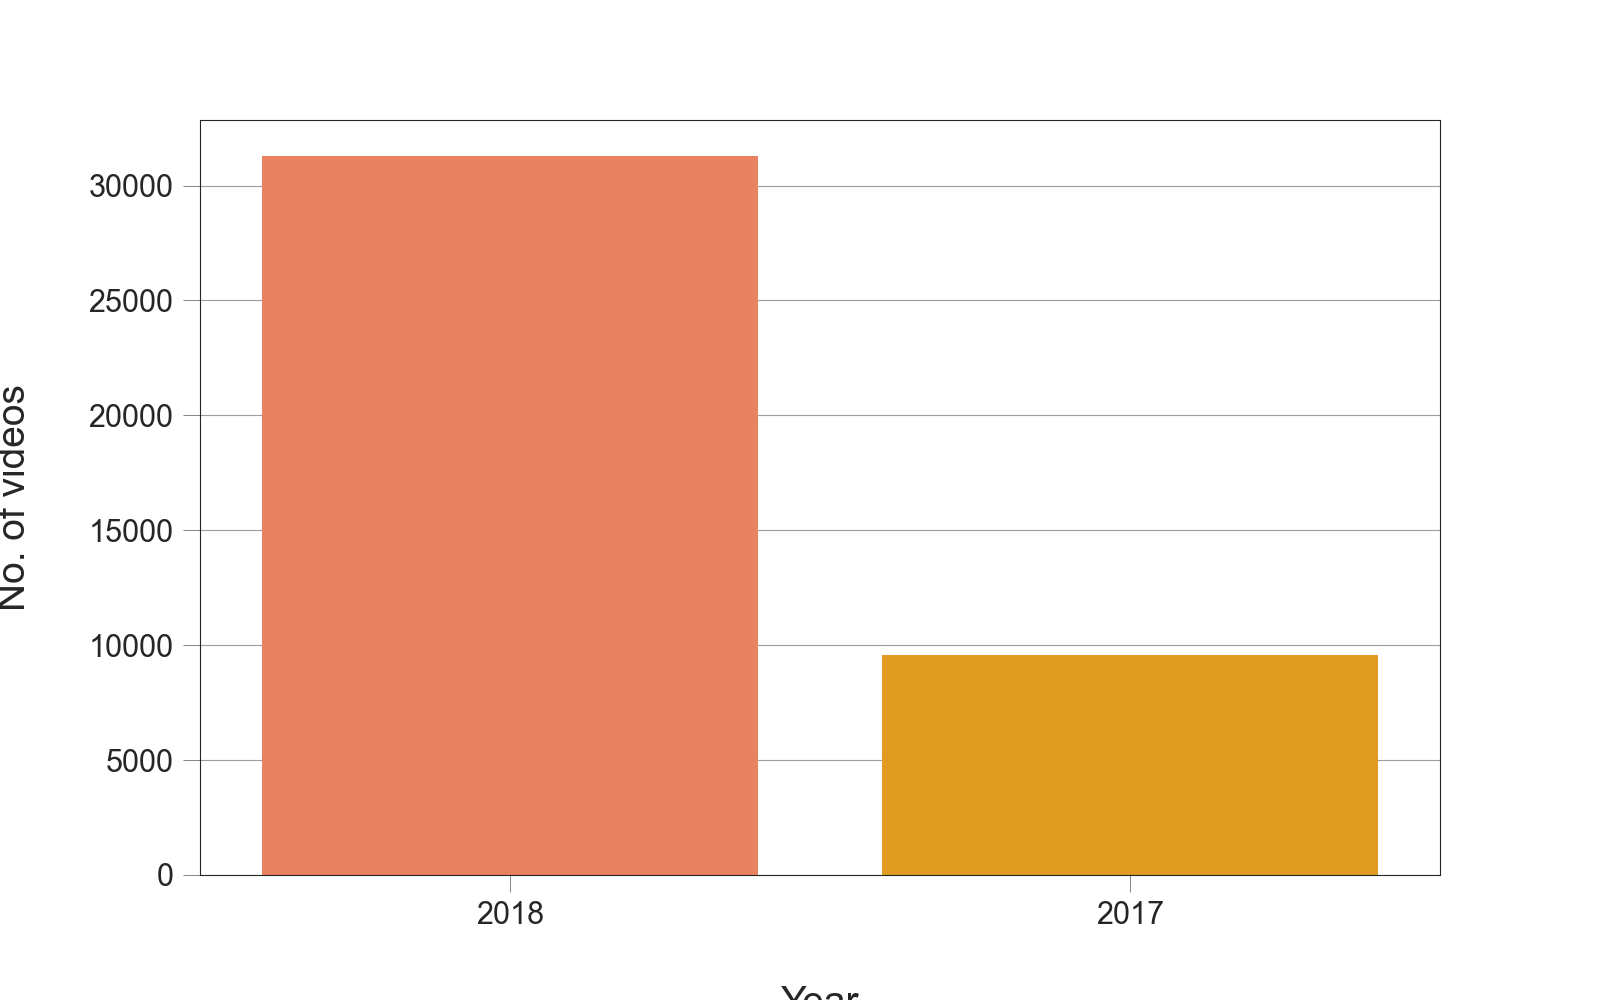

In [48]:
# 1、Data collection years
cdf = df["trending_date"].apply(lambda x: '20' + x[:2]).value_counts() \
            .to_frame().reset_index() \
            .rename(columns={"index": "year", "trending_date": "No_of_videos"})

fig, ax = plt.subplots()
_ = sns.barplot(x="year", y="No_of_videos", data=cdf, 
                palette=sns.color_palette(['#ff764a', '#ffa600'], n_colors=7), ax=ax)
_ = ax.set(xlabel="Year", ylabel="No. of videos")

In [49]:
# distribution of data collected year 
df["trending_date"].apply(lambda x: '20' + x[:2]).value_counts(normalize=True)

2018   0.77
2017   0.23
Name: trending_date, dtype: float64

<IPython.core.display.Javascript object>


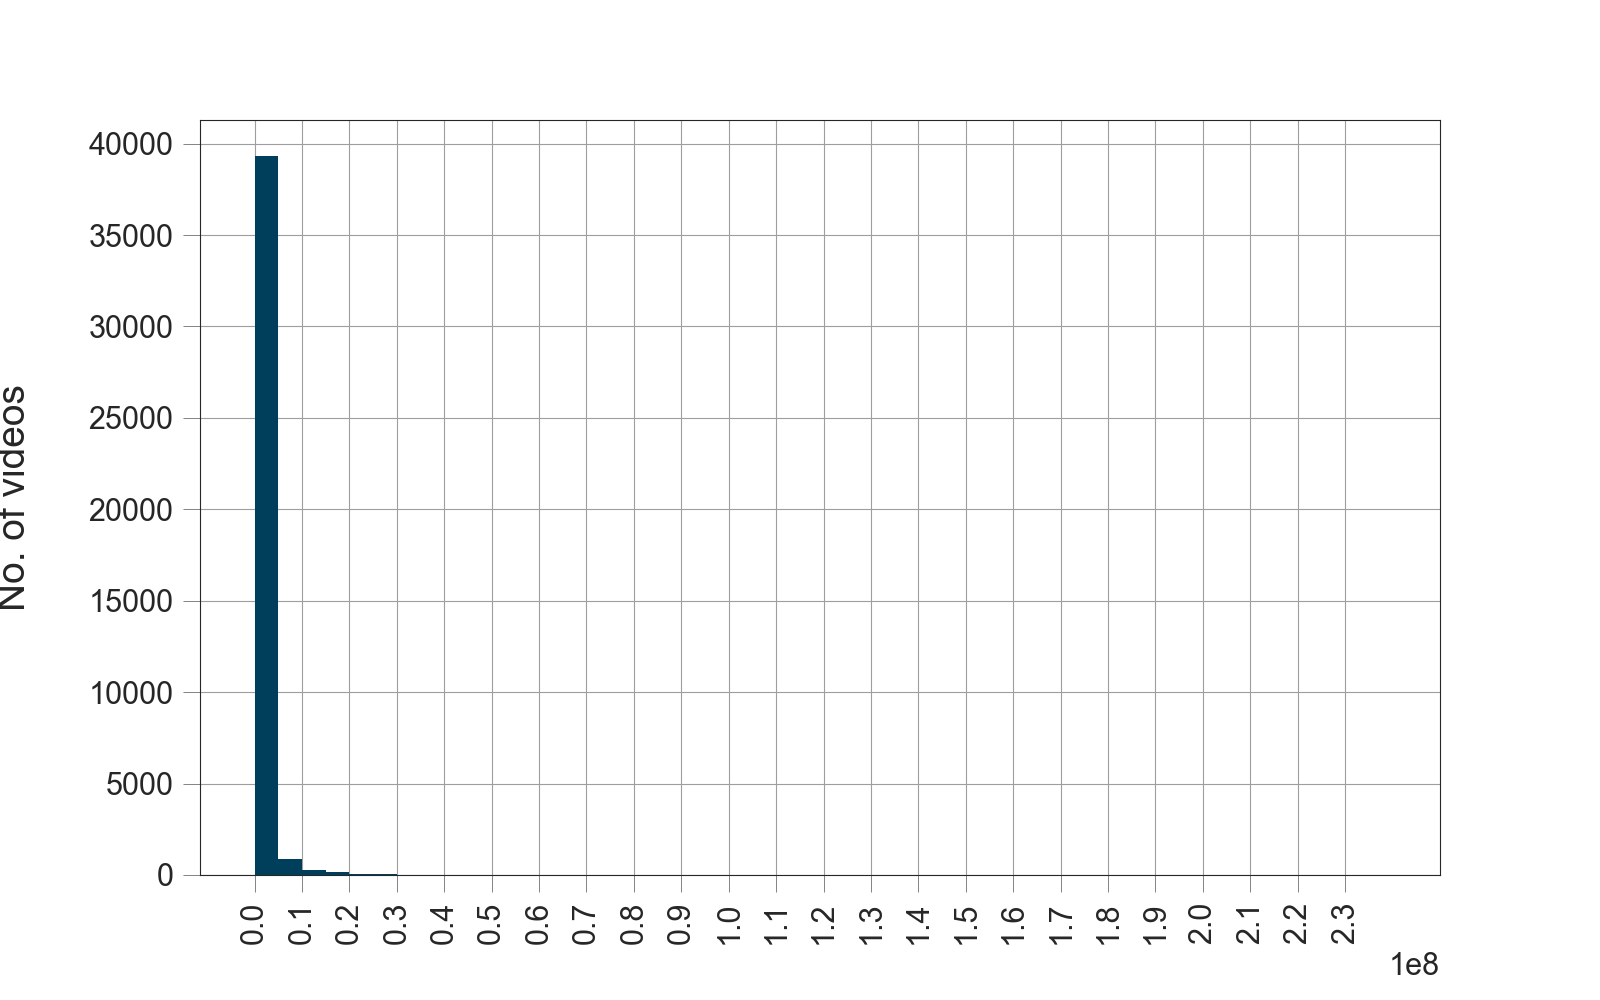

In [51]:
# 2、views
fig, ax = plt.subplots()
_ = sns.distplot(df["views"], kde=False, color=PLOT_COLORS[4], 
                 hist_kws={'alpha': 1}, bins=np.linspace(0, 2.3e8, 47), ax=ax)
_ = ax.set(xlabel="Views", ylabel="No. of videos", xticks=np.arange(0, 2.4e8, 1e7))
_ = ax.set_xlim(right=2.5e8)
_ = plt.xticks(rotation=90)

<IPython.core.display.Javascript object>


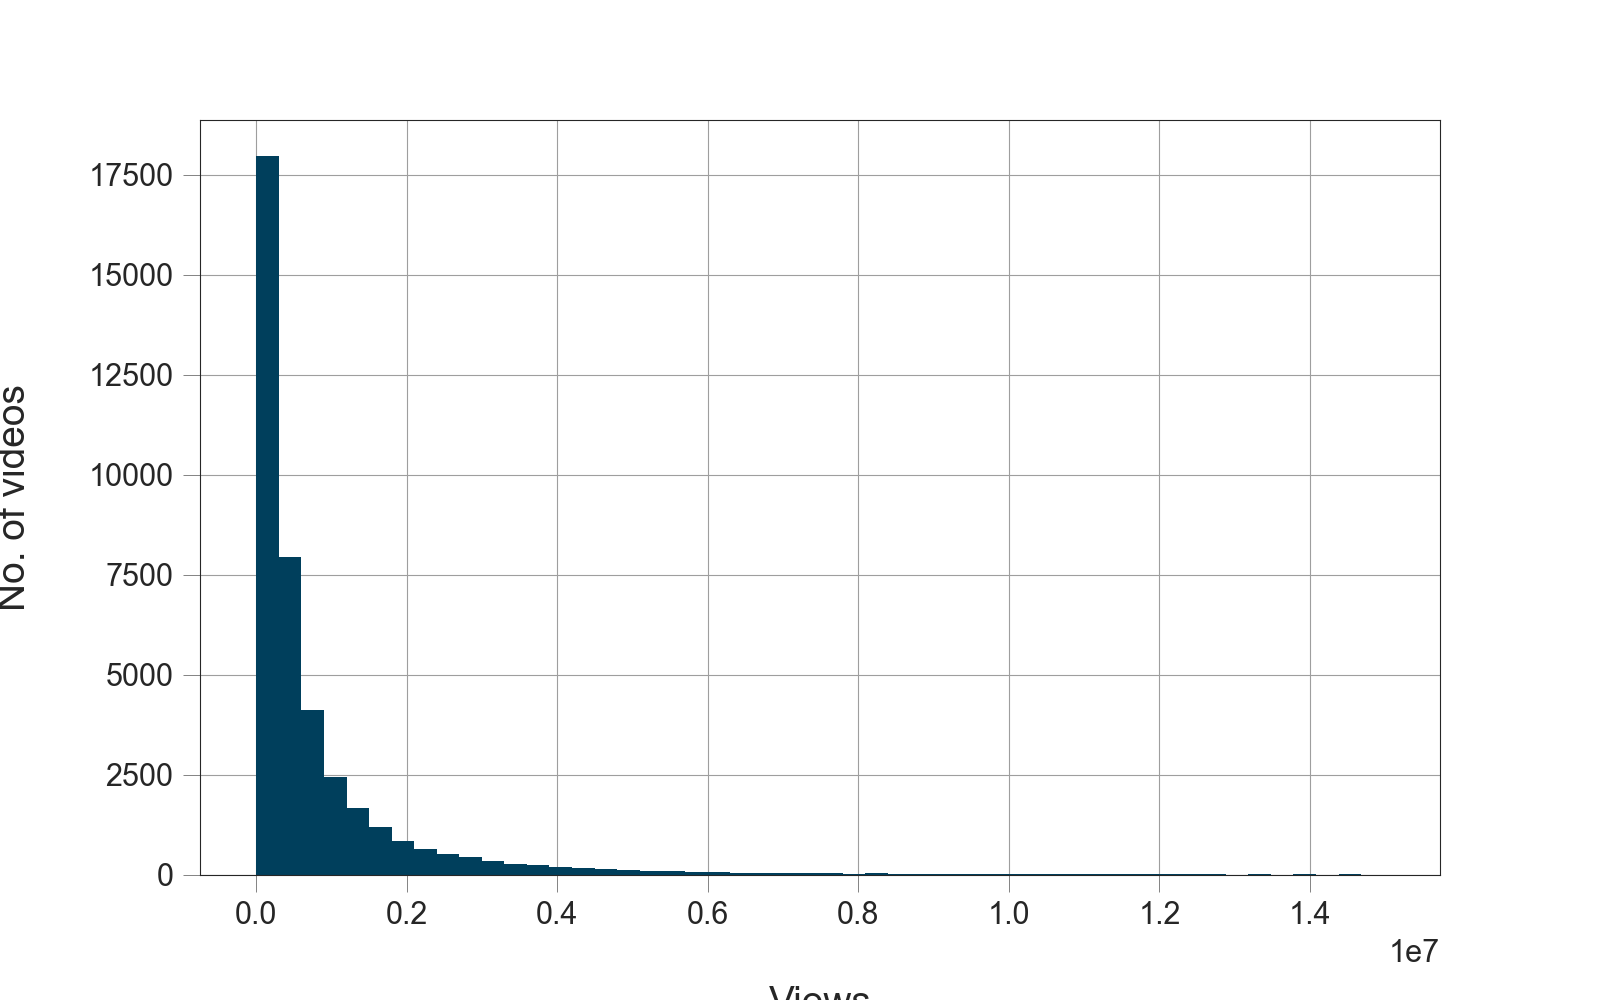

In [86]:
# just for videos with 20 million views or less
fig, ax = plt.subplots()
_ = sns.distplot(df[df["views"] < 15e6]["views"], kde=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Views", ylabel="No. of videos")

In [53]:
# the majority of trending videos have 1 million views or less.
# The exact percentage of videos less than 1 million views
df[df['views'] < 1e6]['views'].count() / df['views'].count() * 100

75.8200631100022

<IPython.core.display.Javascript object>


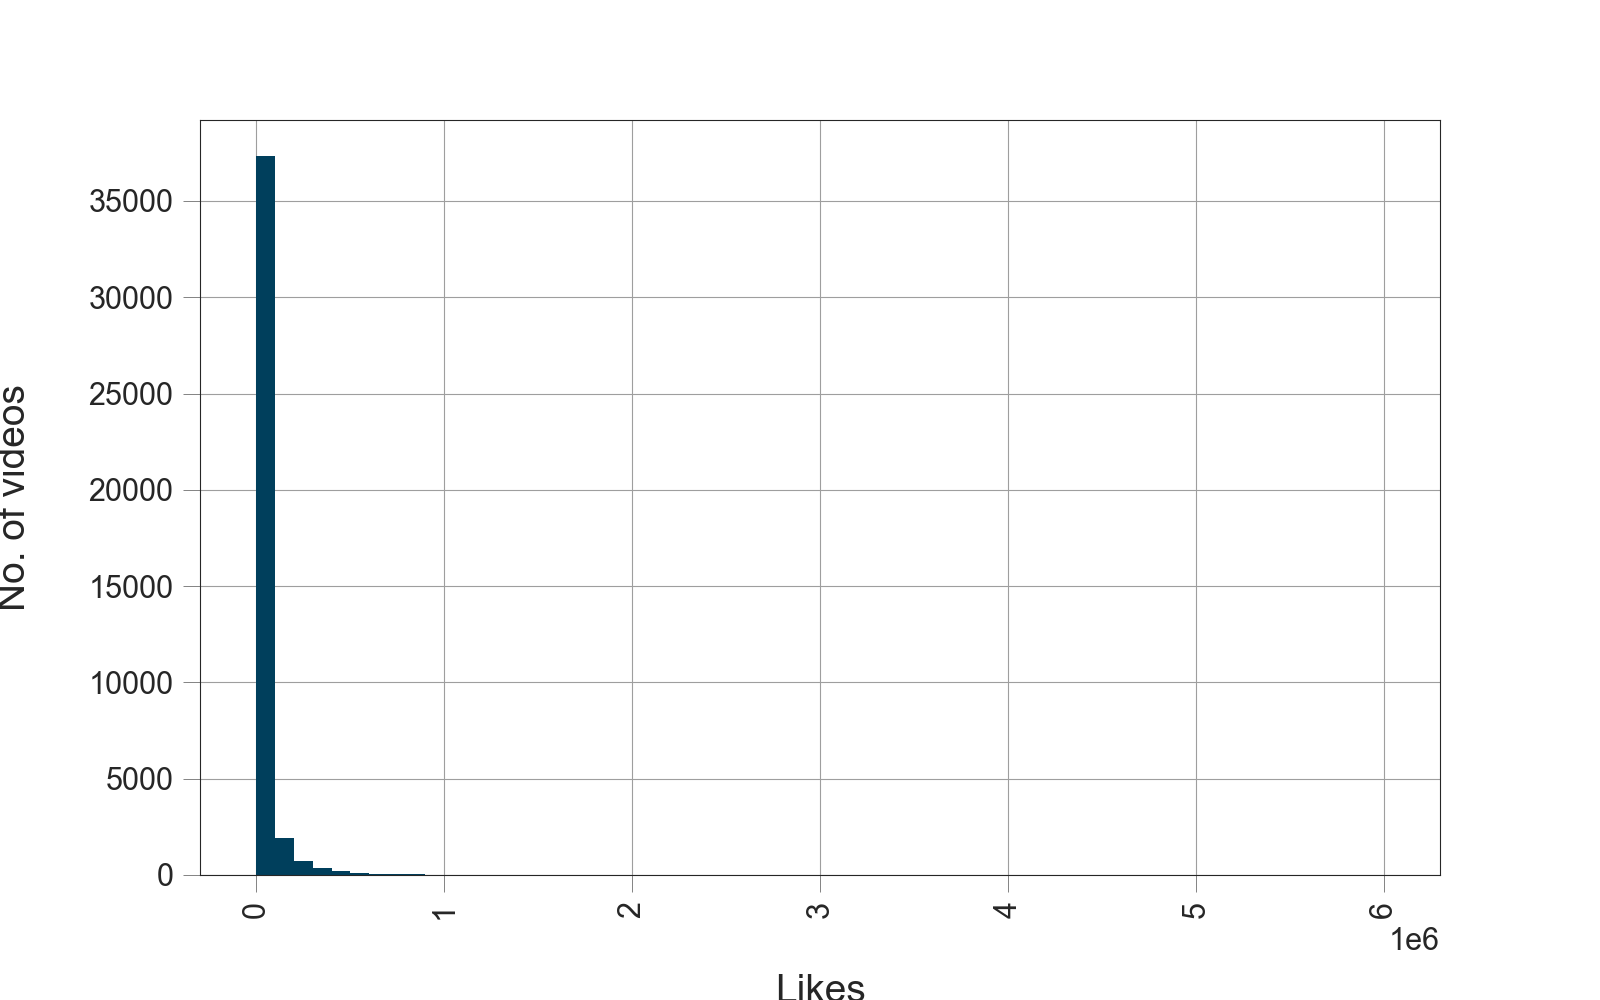

In [54]:
# 3、likes
plt.rc('figure.subplot', wspace=0.9)
fig, ax = plt.subplots()
_ = sns.distplot(df["likes"], kde=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, 
                 bins=np.linspace(0, 6e6, 61), ax=ax)
_ = ax.set(xlabel="Likes", ylabel="No. of videos")
_ = plt.xticks(rotation=90)

<IPython.core.display.Javascript object>


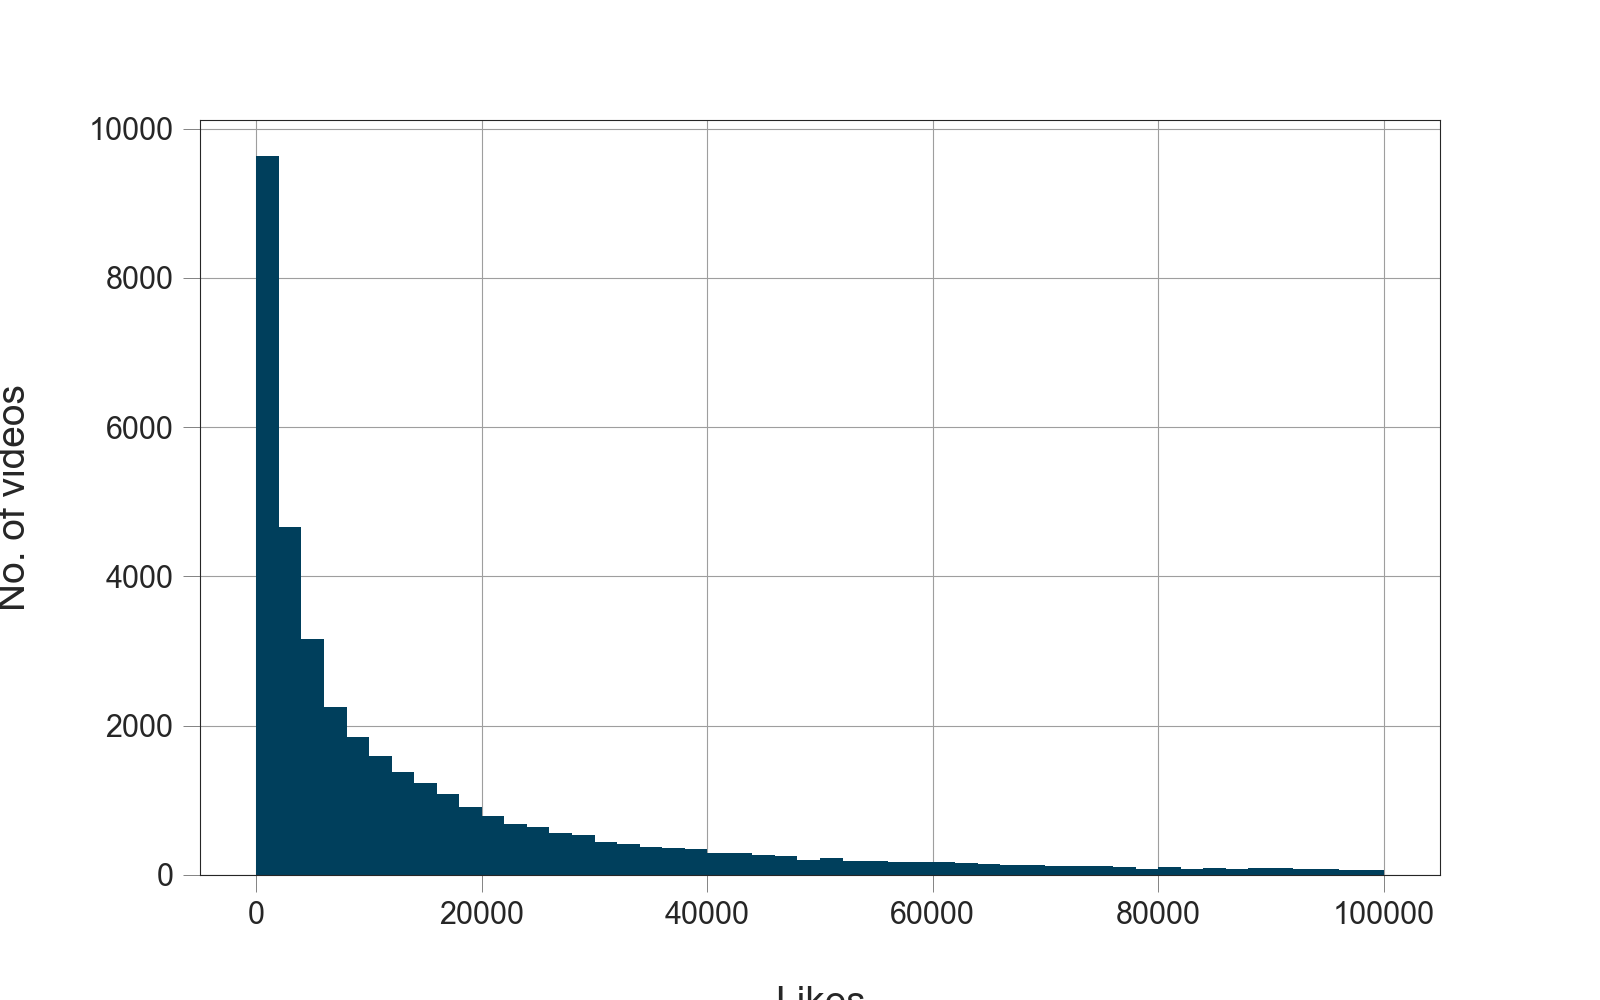

In [55]:
#  just for videos with 1000,000 likes or less 
fig, ax = plt.subplots()
_ = sns.distplot(df[df["likes"] <= 1e5]["likes"], kde=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Likes", ylabel="No. of videos")

In [56]:
# the exact percentage of videos with less than 40000 likes
df[df['likes'] < 4e4]['likes'].count() / df['likes'].count() * 100

80.5802206403953

<IPython.core.display.Javascript object>


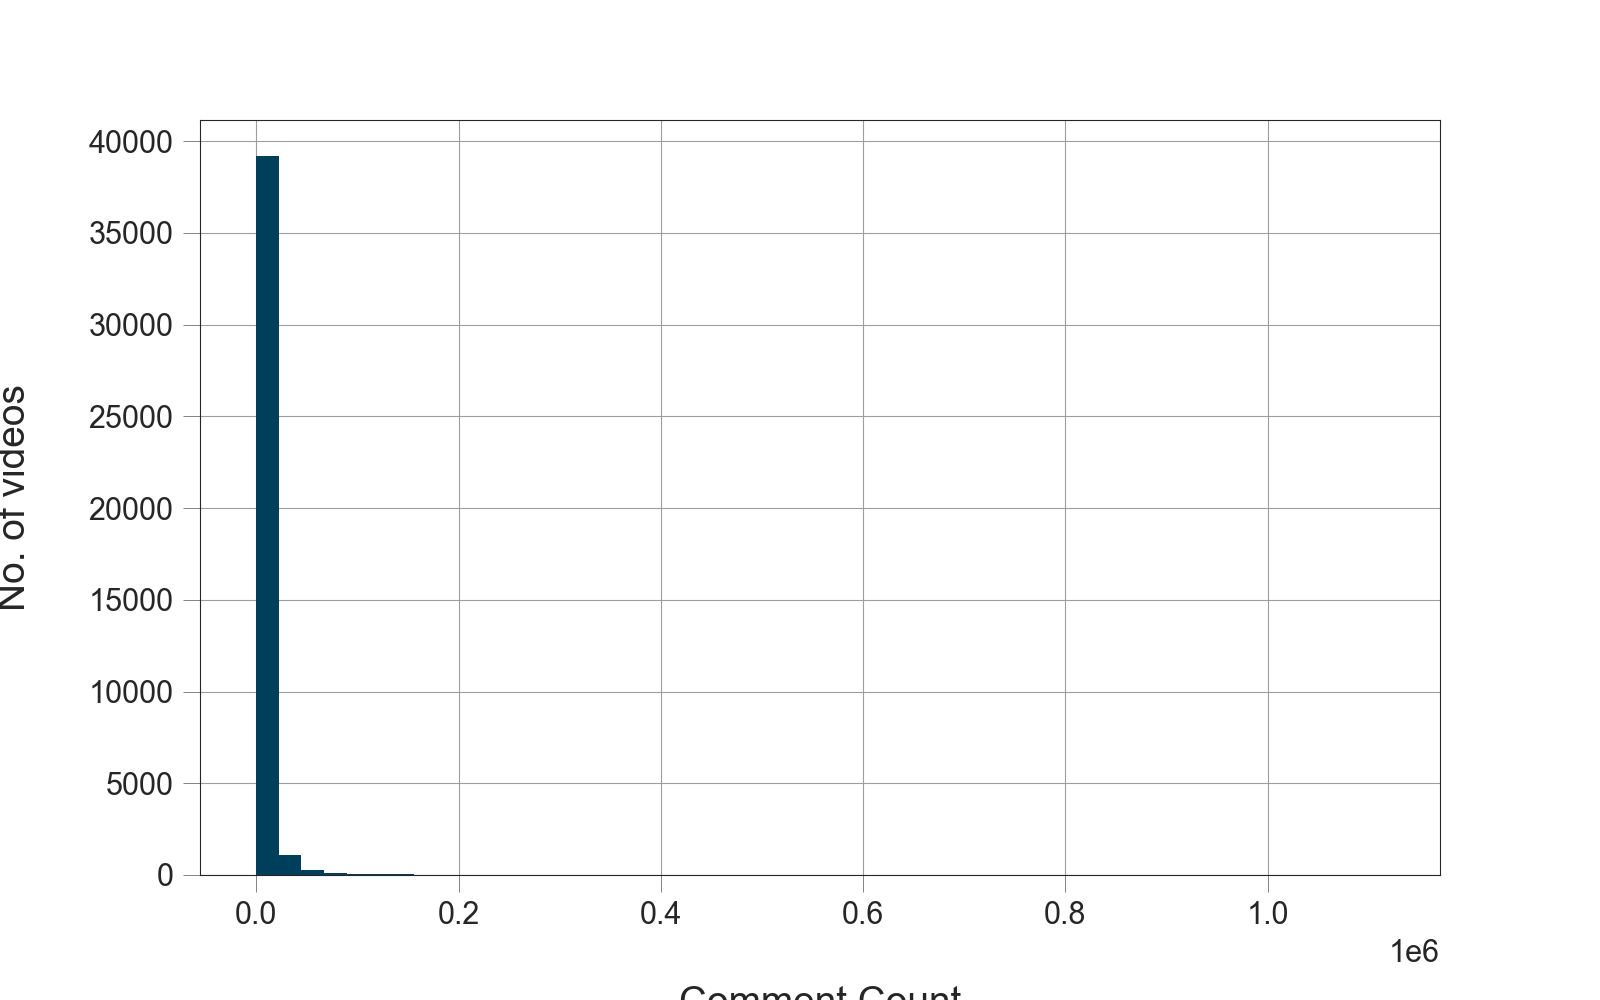

In [57]:
# 4、comment_count
fig, ax = plt.subplots()
_ = sns.distplot(df["comment_count"], kde=False, rug=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Comment Count", ylabel="No. of videos")

<IPython.core.display.Javascript object>


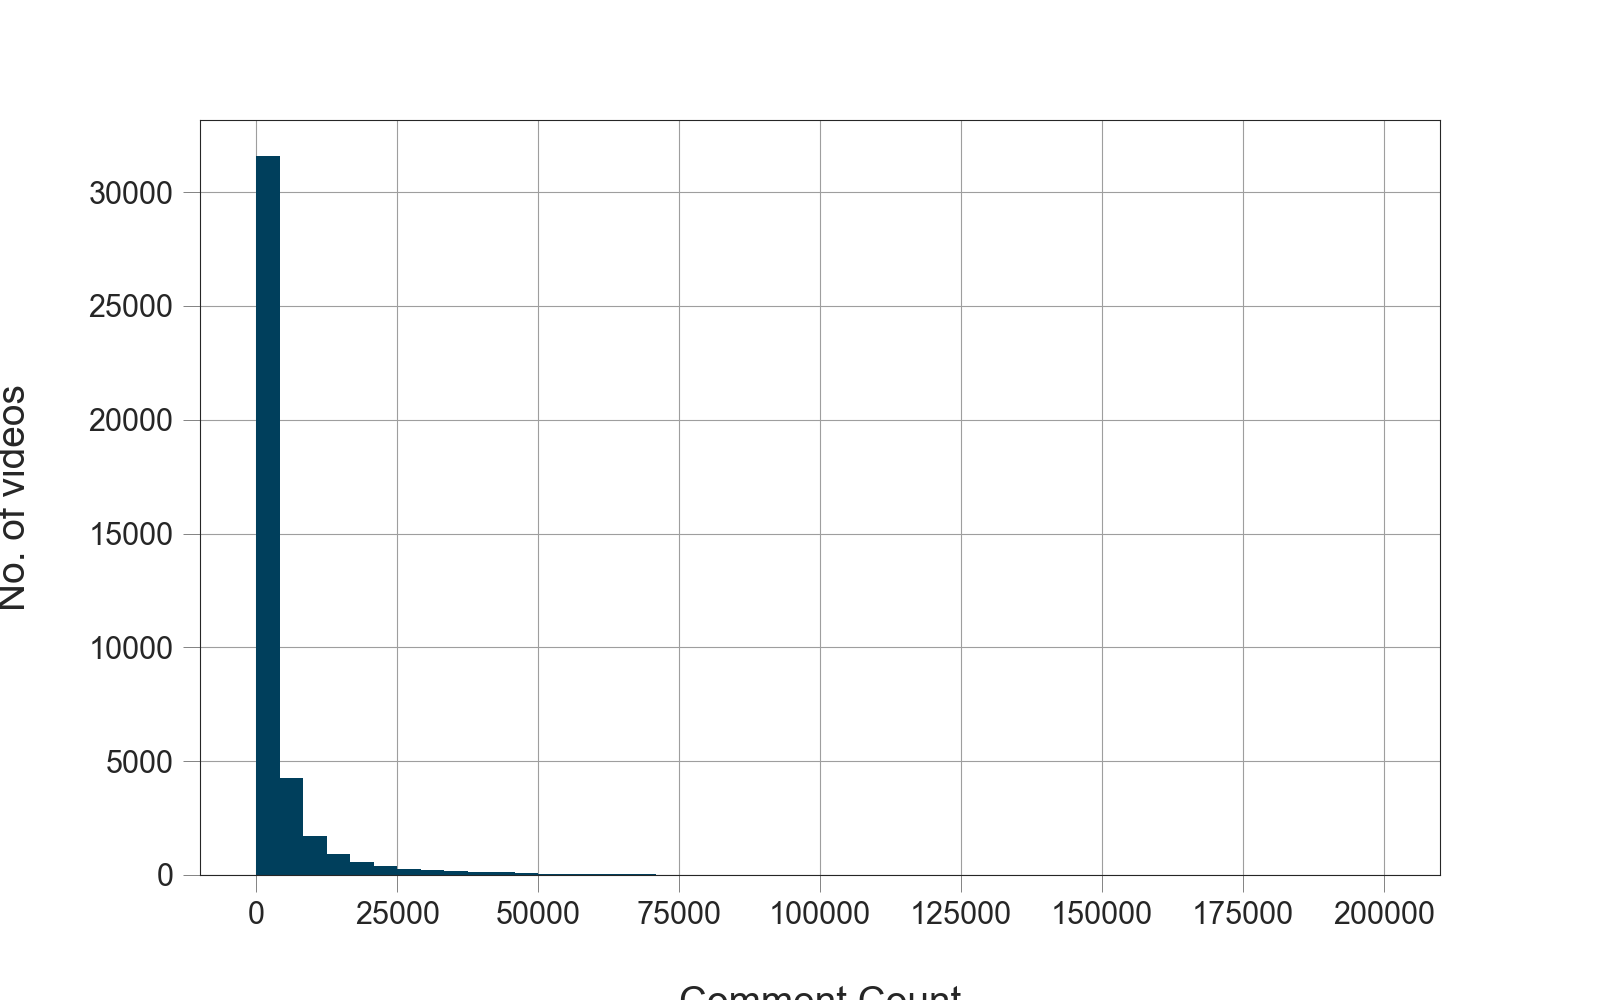

In [58]:
# comment count larger than 200000
fig, ax = plt.subplots()
_ = sns.distplot(df[df["comment_count"] < 200000]["comment_count"], kde=False, rug=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, 
                 bins=np.linspace(0, 2e5, 49), ax=ax)
_ = ax.set(xlabel="Comment Count", ylabel="No. of videos")

In [59]:
#  the percentage of videos with less than 25,000 comments
df[df['comment_count'] < 4000]['comment_count'].count() / df['comment_count'].count() * 100

76.51720848315844

### Non-numerical columns

In [60]:
# Describe non-numerical columns
df.describe(include = ['O'])

video_id trending_date  \
count         40881         40881   
unique        24427           205   
top     VYOjWnS4cMY      18.04.04   
freq              8           200   

                                                    title channel_title  \
count                                               40881         40881   
unique                                              24573          5076   
top     Most Popular Violin Covers of Popular Songs 20...     SET India   
freq                                                   15           192   

                    publish_time    tags  \
count                      40881   40881   
unique                     23613   20157   
top     2017-12-20T23:00:00.000Z  [none]   
freq                          11    2385   

                                        thumbnail_link  \
count                                            40881   
unique                                           24422   
top     https://i.ytimg.com/vi/UceaB4D0jpo/default.jpg   
freq                                                 8   

                                              description  
count                                               39585  
unique                                              22345  
top     Subscribers Link: http://bit.ly/2qb69dZ\n\nCon...  
freq                                                  130

<IPython.core.display.Javascript object>


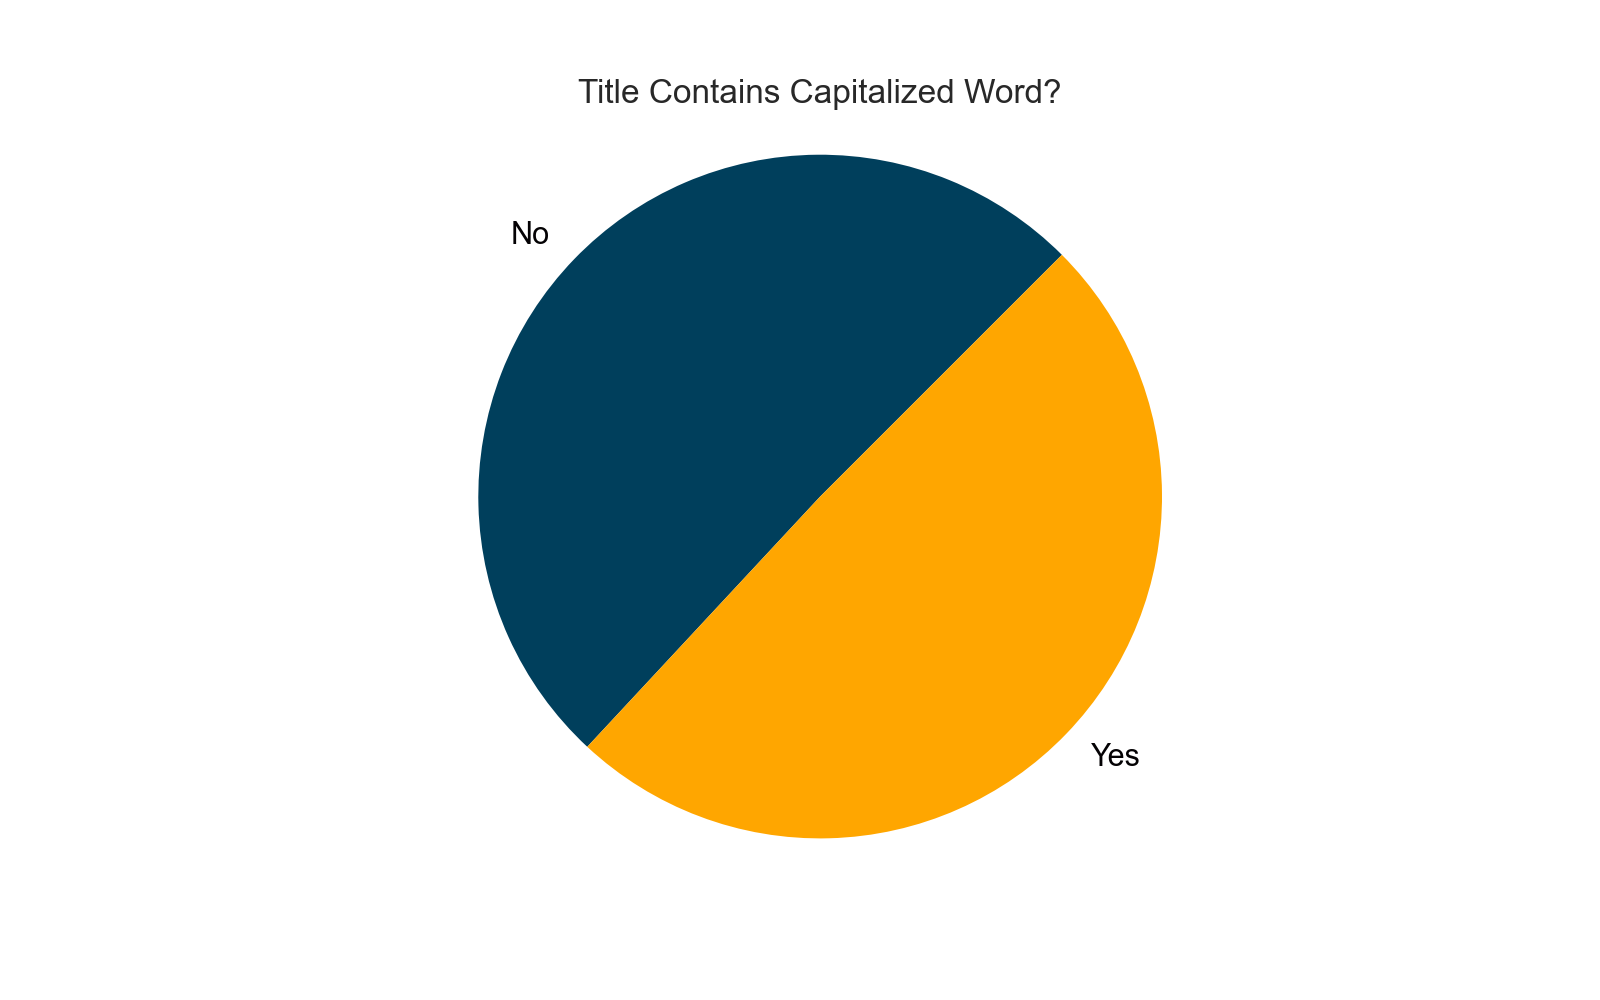

In [61]:
# 1、how many trending video titles contain at least a capitalized word 
def contains_capitalized_word(s):
    for w in s.split():
        if w.isupper():
            return True
    return False


df["contains_capitalized"] = df["title"].apply(contains_capitalized_word)

value_counts = df["contains_capitalized"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'], 
           colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'}, startangle=45)
_ = ax.axis('equal')
_ = ax.set_title('Title Contains Capitalized Word?')

In [62]:
df["contains_capitalized"].value_counts(normalize=True)

False   0.51
True    0.49
Name: contains_capitalized, dtype: float64

<IPython.core.display.Javascript object>


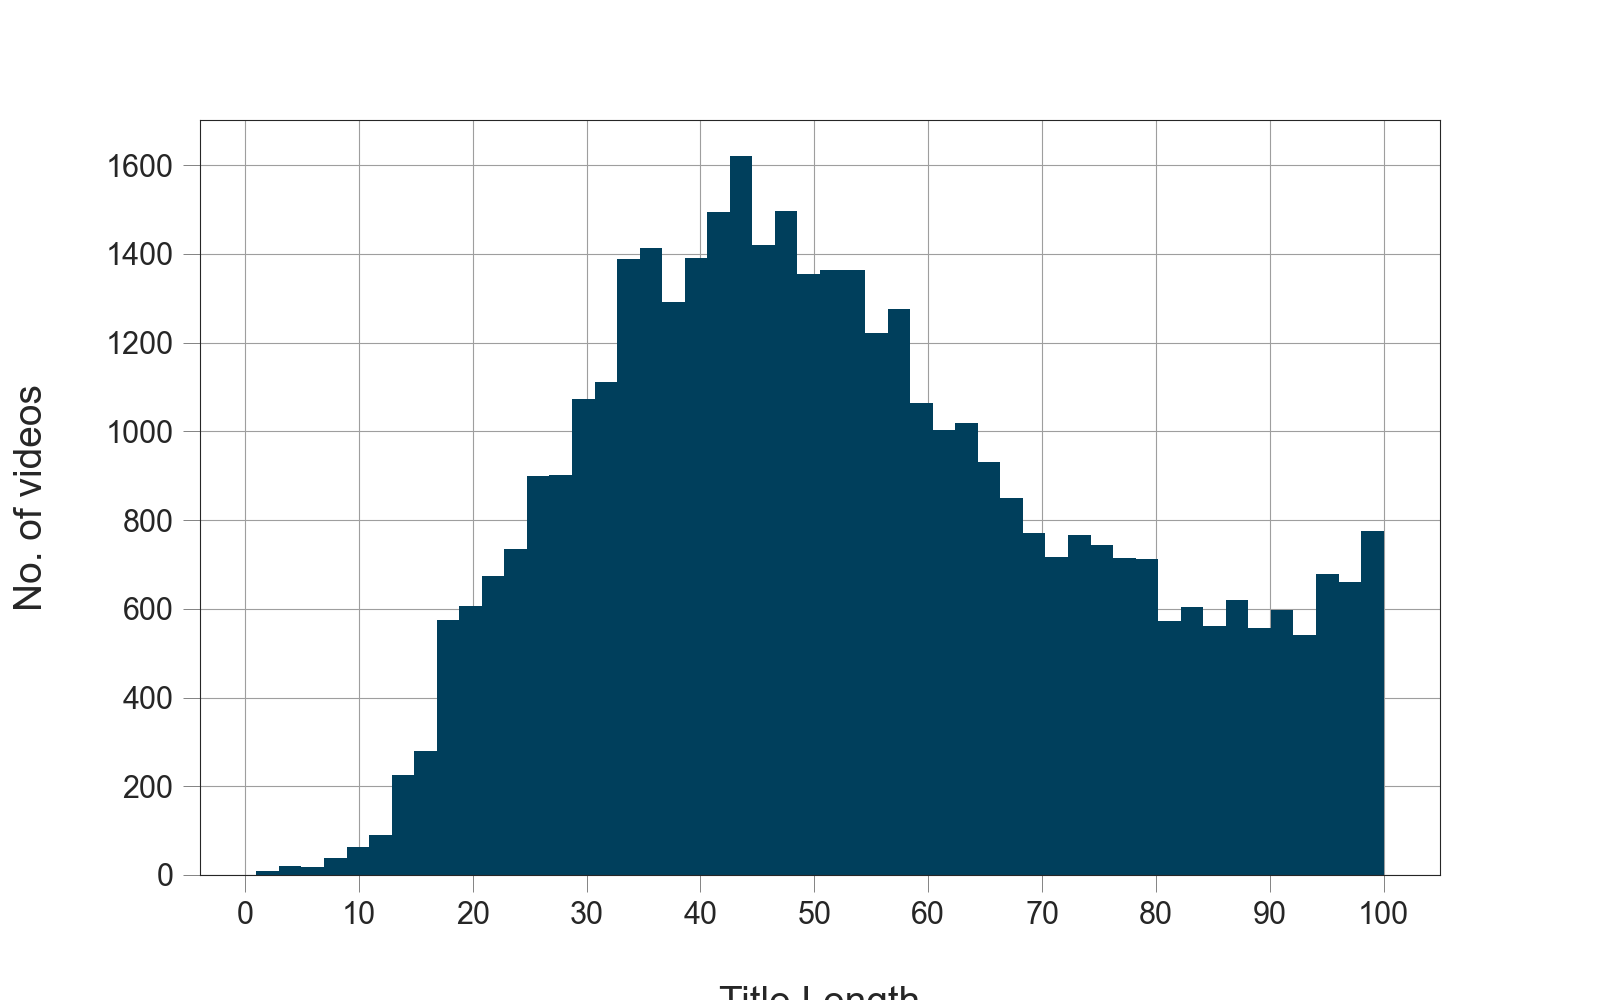

In [63]:
# 2、the lengths of trnding video titles
df["title_length"] = df["title"].apply(lambda x: len(x))

fig, ax = plt.subplots()
_ = sns.distplot(df["title_length"], kde=False, rug=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Title Length", ylabel="No. of videos", xticks=range(0, 110, 10))

<IPython.core.display.Javascript object>


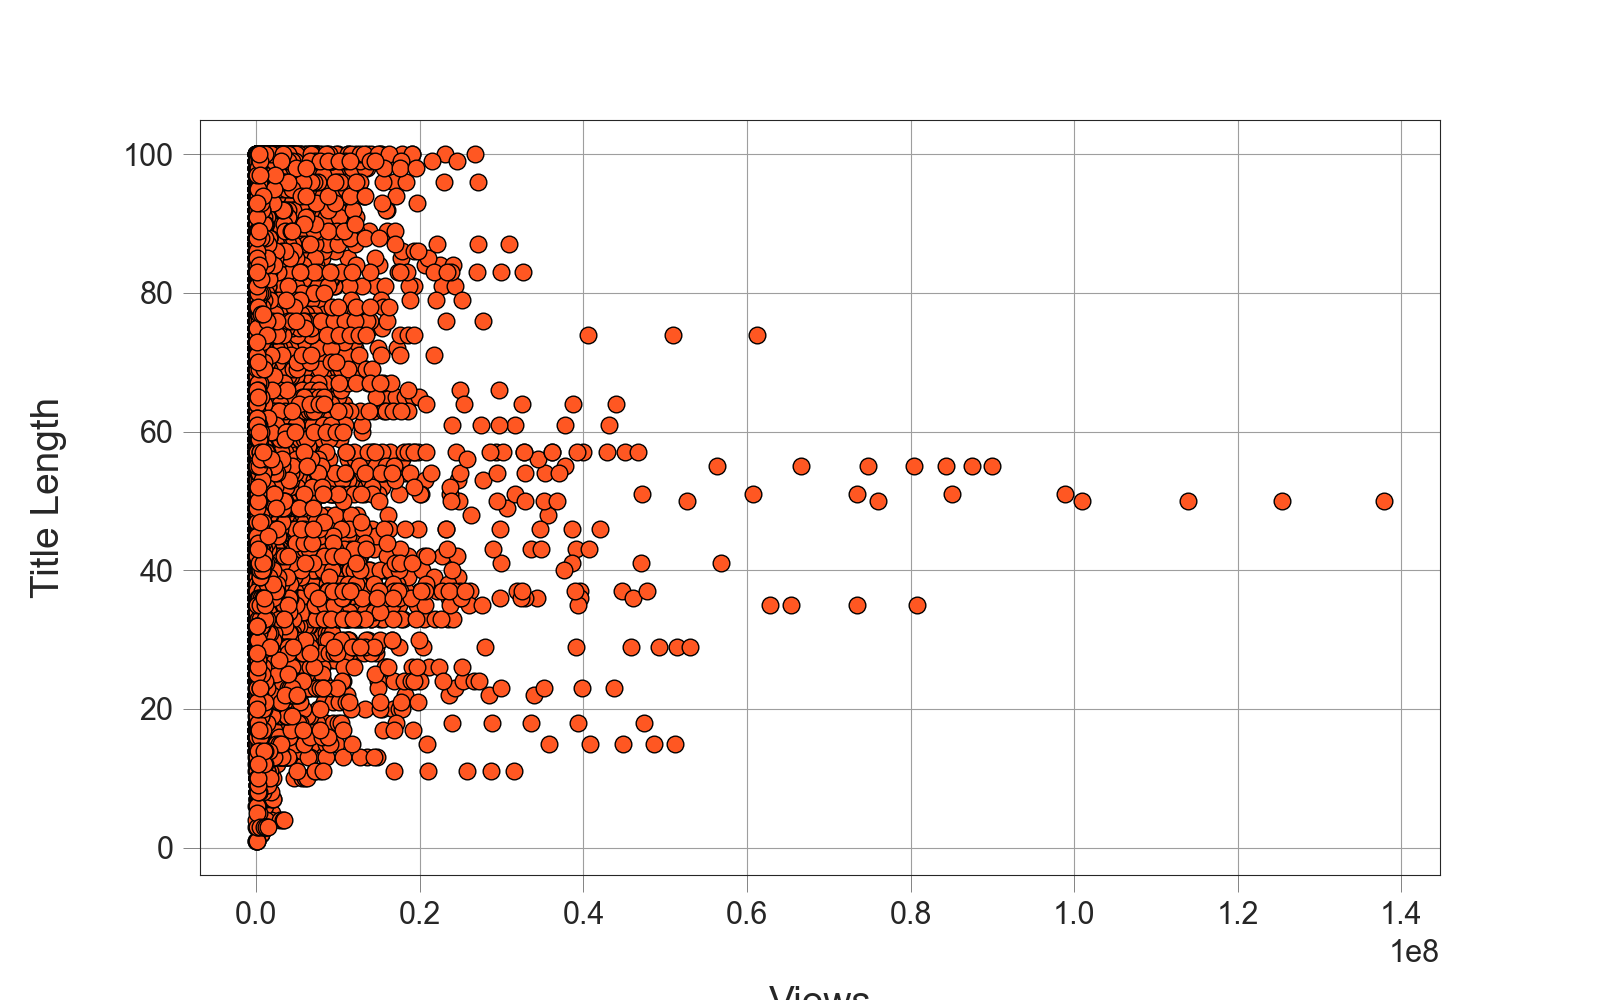

In [64]:
# 3、the relationship between title length and number of views 
fig, ax = plt.subplots()
_ = ax.scatter(x=df['views'], y=df['title_length'], color=PLOT_COLORS[2], edgecolors="#000000", linewidths=0.5)
_ = ax.set(xlabel="Views", ylabel="Title Length")

### Correlation between 2 variables

In [65]:
df.corr()

category_id  views  likes  dislikes  comment_count  \
category_id                    1.00  -0.14  -0.14     -0.03          -0.07   
views                         -0.14   1.00   0.83      0.56           0.69   
likes                         -0.14   0.83   1.00      0.46           0.84   
dislikes                      -0.03   0.56   0.46      1.00           0.64   
comment_count                 -0.07   0.69   0.84      0.64           1.00   
comments_disabled              0.04   0.00  -0.02     -0.01          -0.03   
ratings_disabled               0.02   0.01  -0.02     -0.01          -0.02   
video_error_or_removed        -0.03   0.00   0.00      0.00           0.00   
contains_capitalized          -0.00  -0.02  -0.01     -0.02           0.01   
title_length                  -0.05  -0.01  -0.09     -0.01          -0.06   

                        comments_disabled  ratings_disabled  \
category_id                          0.04              0.02   
views                                0.00              0.01   
likes                               -0.02             -0.02   
dislikes                            -0.01             -0.01   
comment_count                       -0.03             -0.02   
comments_disabled                    1.00              0.15   
ratings_disabled                     0.15              1.00   
video_error_or_removed              -0.00             -0.00   
contains_capitalized                -0.03             -0.00   
title_length                         0.03              0.00   

                        video_error_or_removed  contains_capitalized  \
category_id                              -0.03                 -0.00   
views                                     0.00                 -0.02   
likes                                     0.00                 -0.01   
dislikes                                  0.00                 -0.02   
comment_count                             0.00                  0.01   
comments_disabled                        -0.00                 -0.03   
ratings_disabled                         -0.00                 -0.00   
video_error_or_removed                    1.00                 -0.02   
contains_capitalized                     -0.02                  1.00   
title_length                             -0.03                  0.15   

                        title_length  
category_id                    -0.05  
views                          -0.01  
likes                          -0.09  
dislikes                       -0.01  
comment_count                  -0.06  
comments_disabled               0.03  
ratings_disabled                0.00  
video_error_or_removed         -0.03  
contains_capitalized            0.15  
title_length                    1.00

<IPython.core.display.Javascript object>


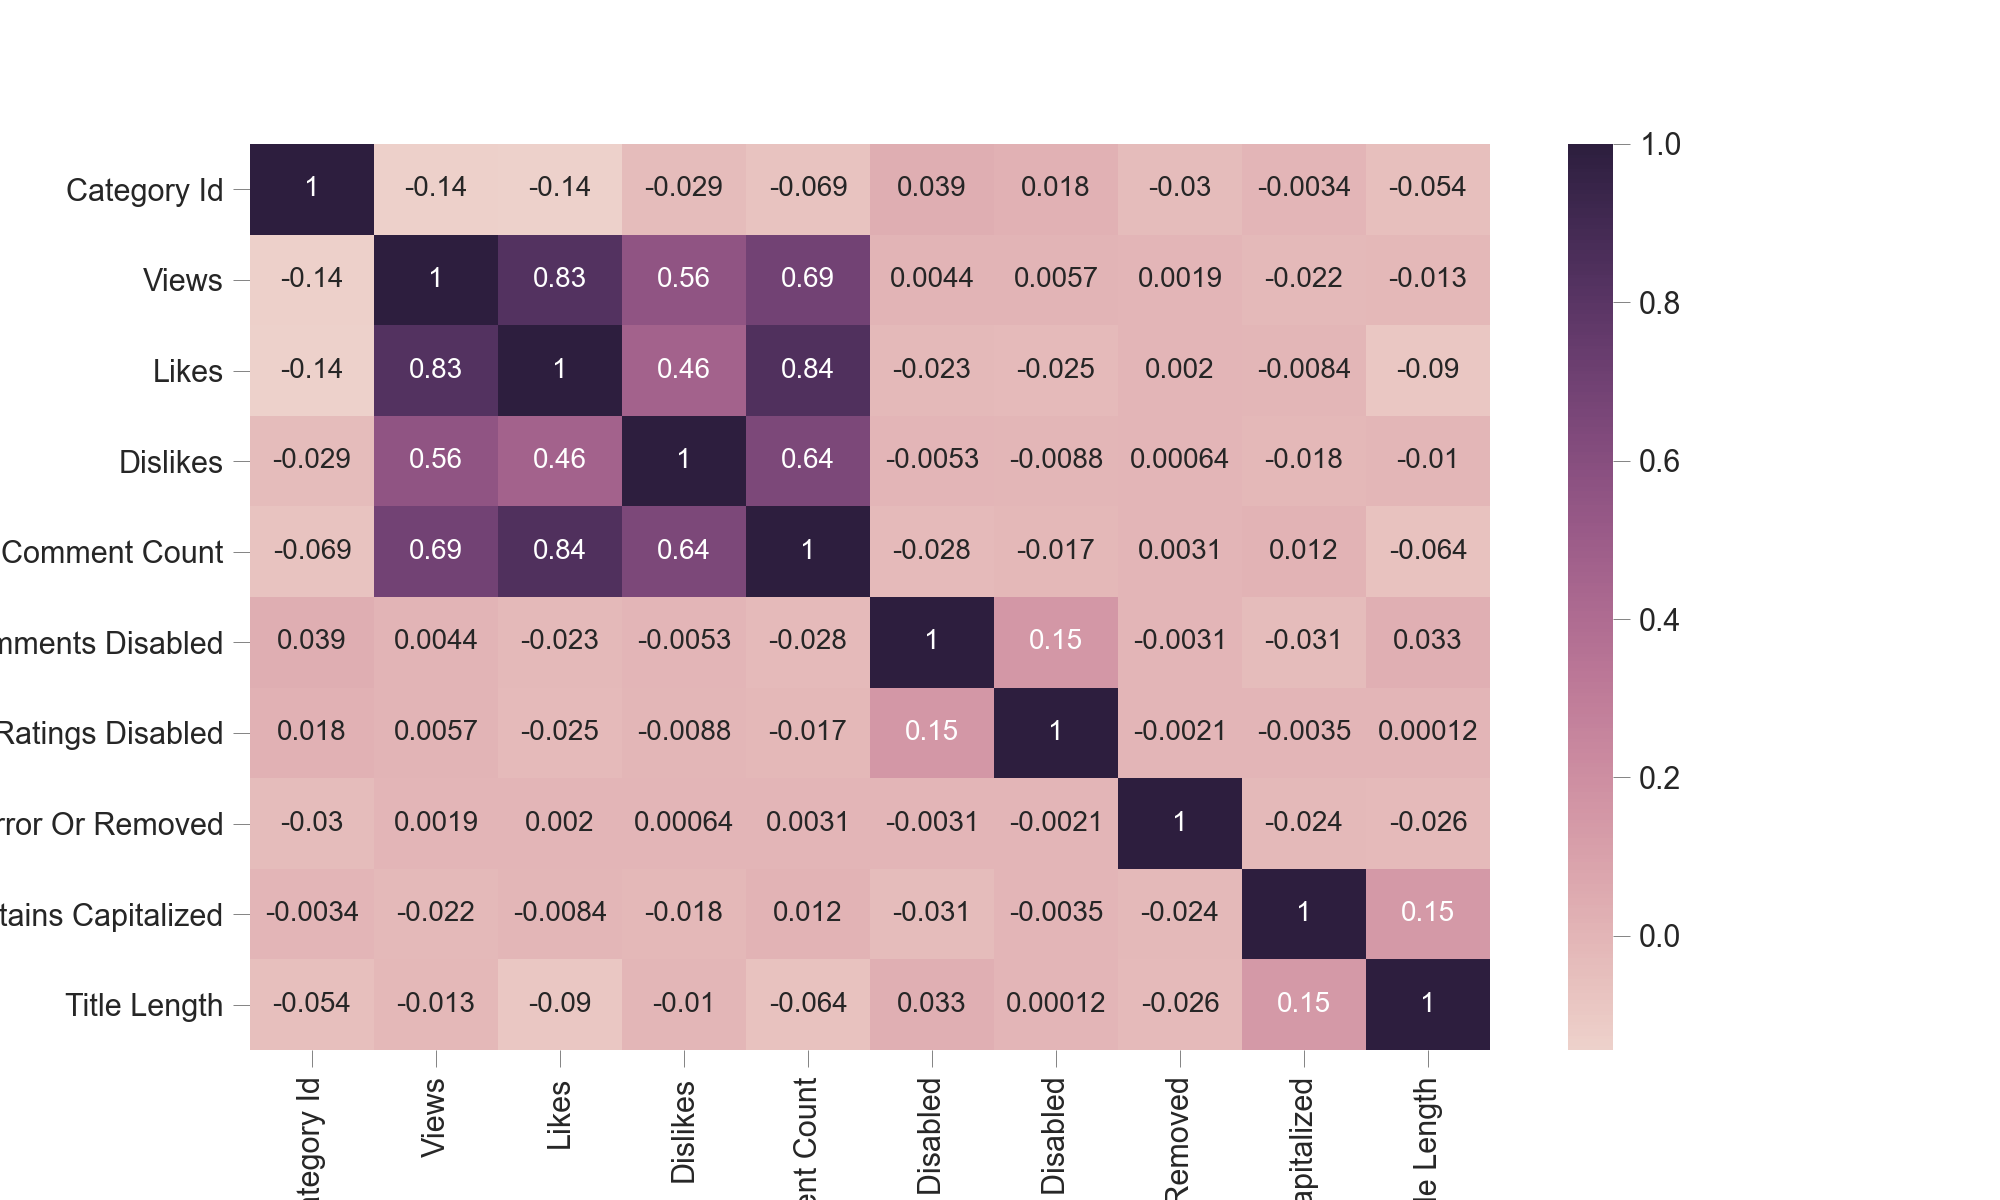

In [66]:
# 1、visualize the correlation table
h_labels = [x.replace('_', ' ').title() for x in 
            list(df.select_dtypes(include=['number', 'bool']).columns.values)]

fig, ax = plt.subplots(figsize=(10,6))
_ = sns.heatmap(df.corr(), annot=True, xticklabels=h_labels, yticklabels=h_labels, cmap=sns.cubehelix_palette(as_cmap=True), ax=ax)

<IPython.core.display.Javascript object>


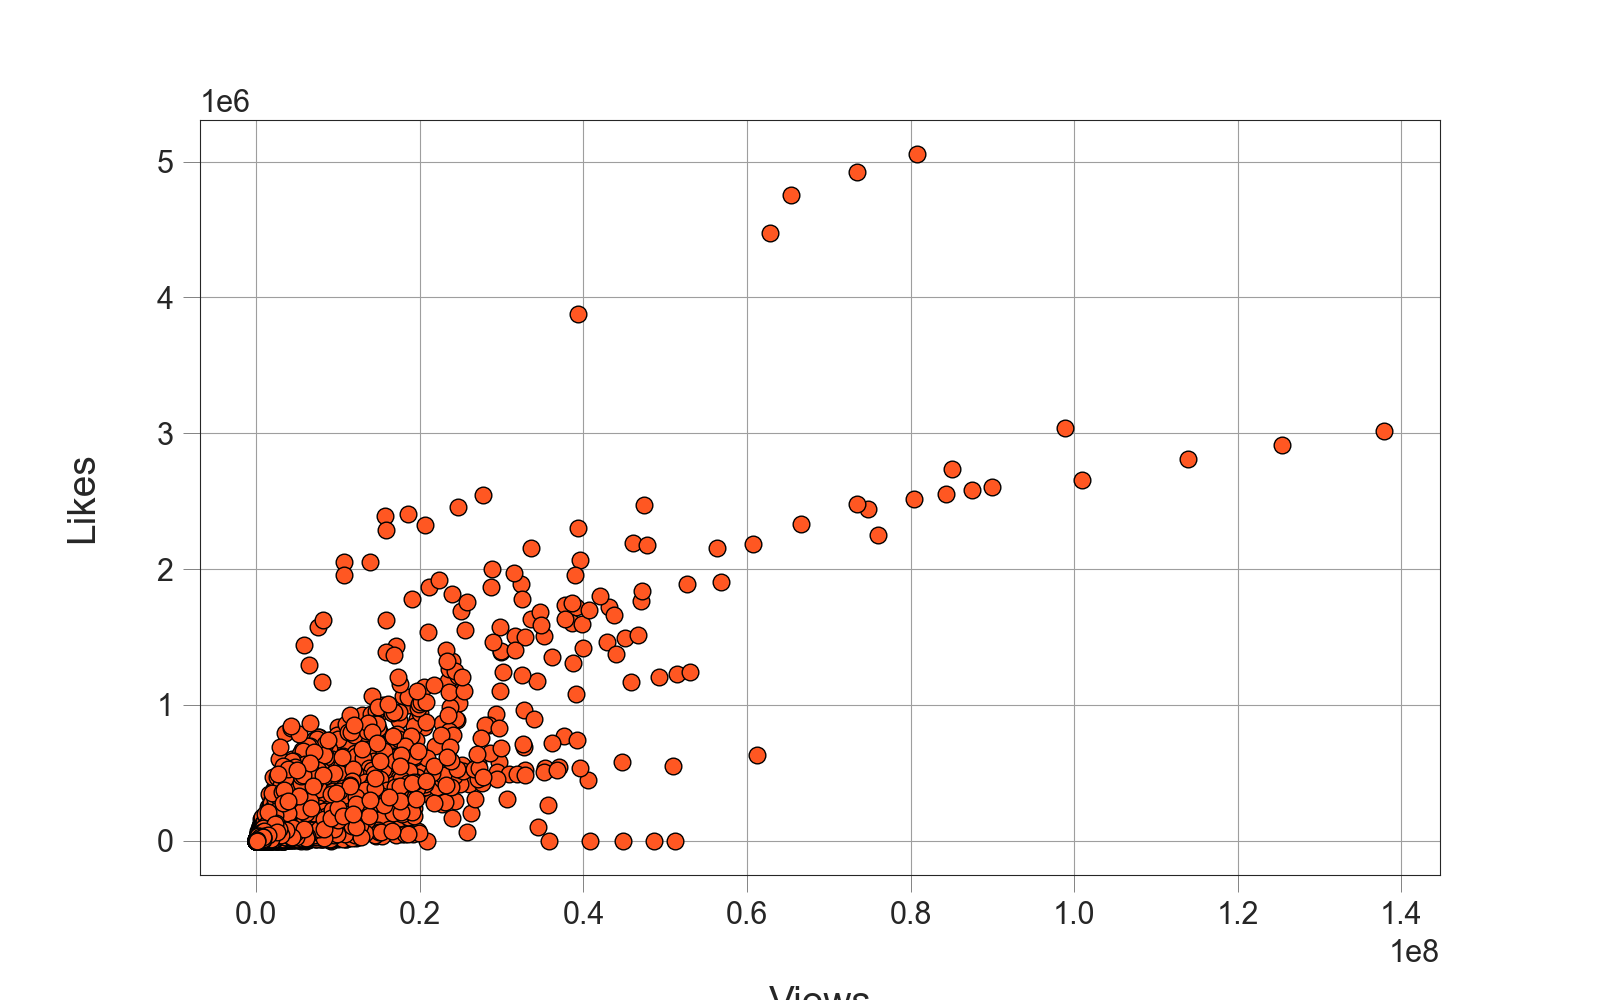

In [67]:
# 2、visualize the relationship between views and likes
fig, ax = plt.subplots()
_ = plt.scatter(x=df['views'], y=df['likes'], color=PLOT_COLORS[2], edgecolors="#000000", linewidths=0.5)
_ = ax.set(xlabel="Views", ylabel="Likes")

### Explore other topic

In [68]:
# 1、Most common words in video titles
title_words = list(df["title"].apply(lambda x: x.split()))
title_words = [x for y in title_words for x in y]
Counter(title_words).most_common(25)

[('-', 12666),
 ('|', 12596),
 ('The', 5167),
 ('2018', 3765),
 ('the', 2498),
 ('Episode', 2298),
 ('&', 2286),
 ('to', 1903),
 ('in', 1797),
 ('of', 1774),
 ('and', 1699),
 ('A', 1522),
 ('on', 1383),
 ('To', 1316),
 ('a', 1279),
 ('2017', 1202),
 ('with', 1200),
 ('vs', 1177),
 ('Game', 1094),
 ('Full', 1056),
 ('2', 1030),
 ('Trump', 962),
 ('I', 938),
 ('In', 930),
 ('Official', 930)]

<IPython.core.display.Javascript object>


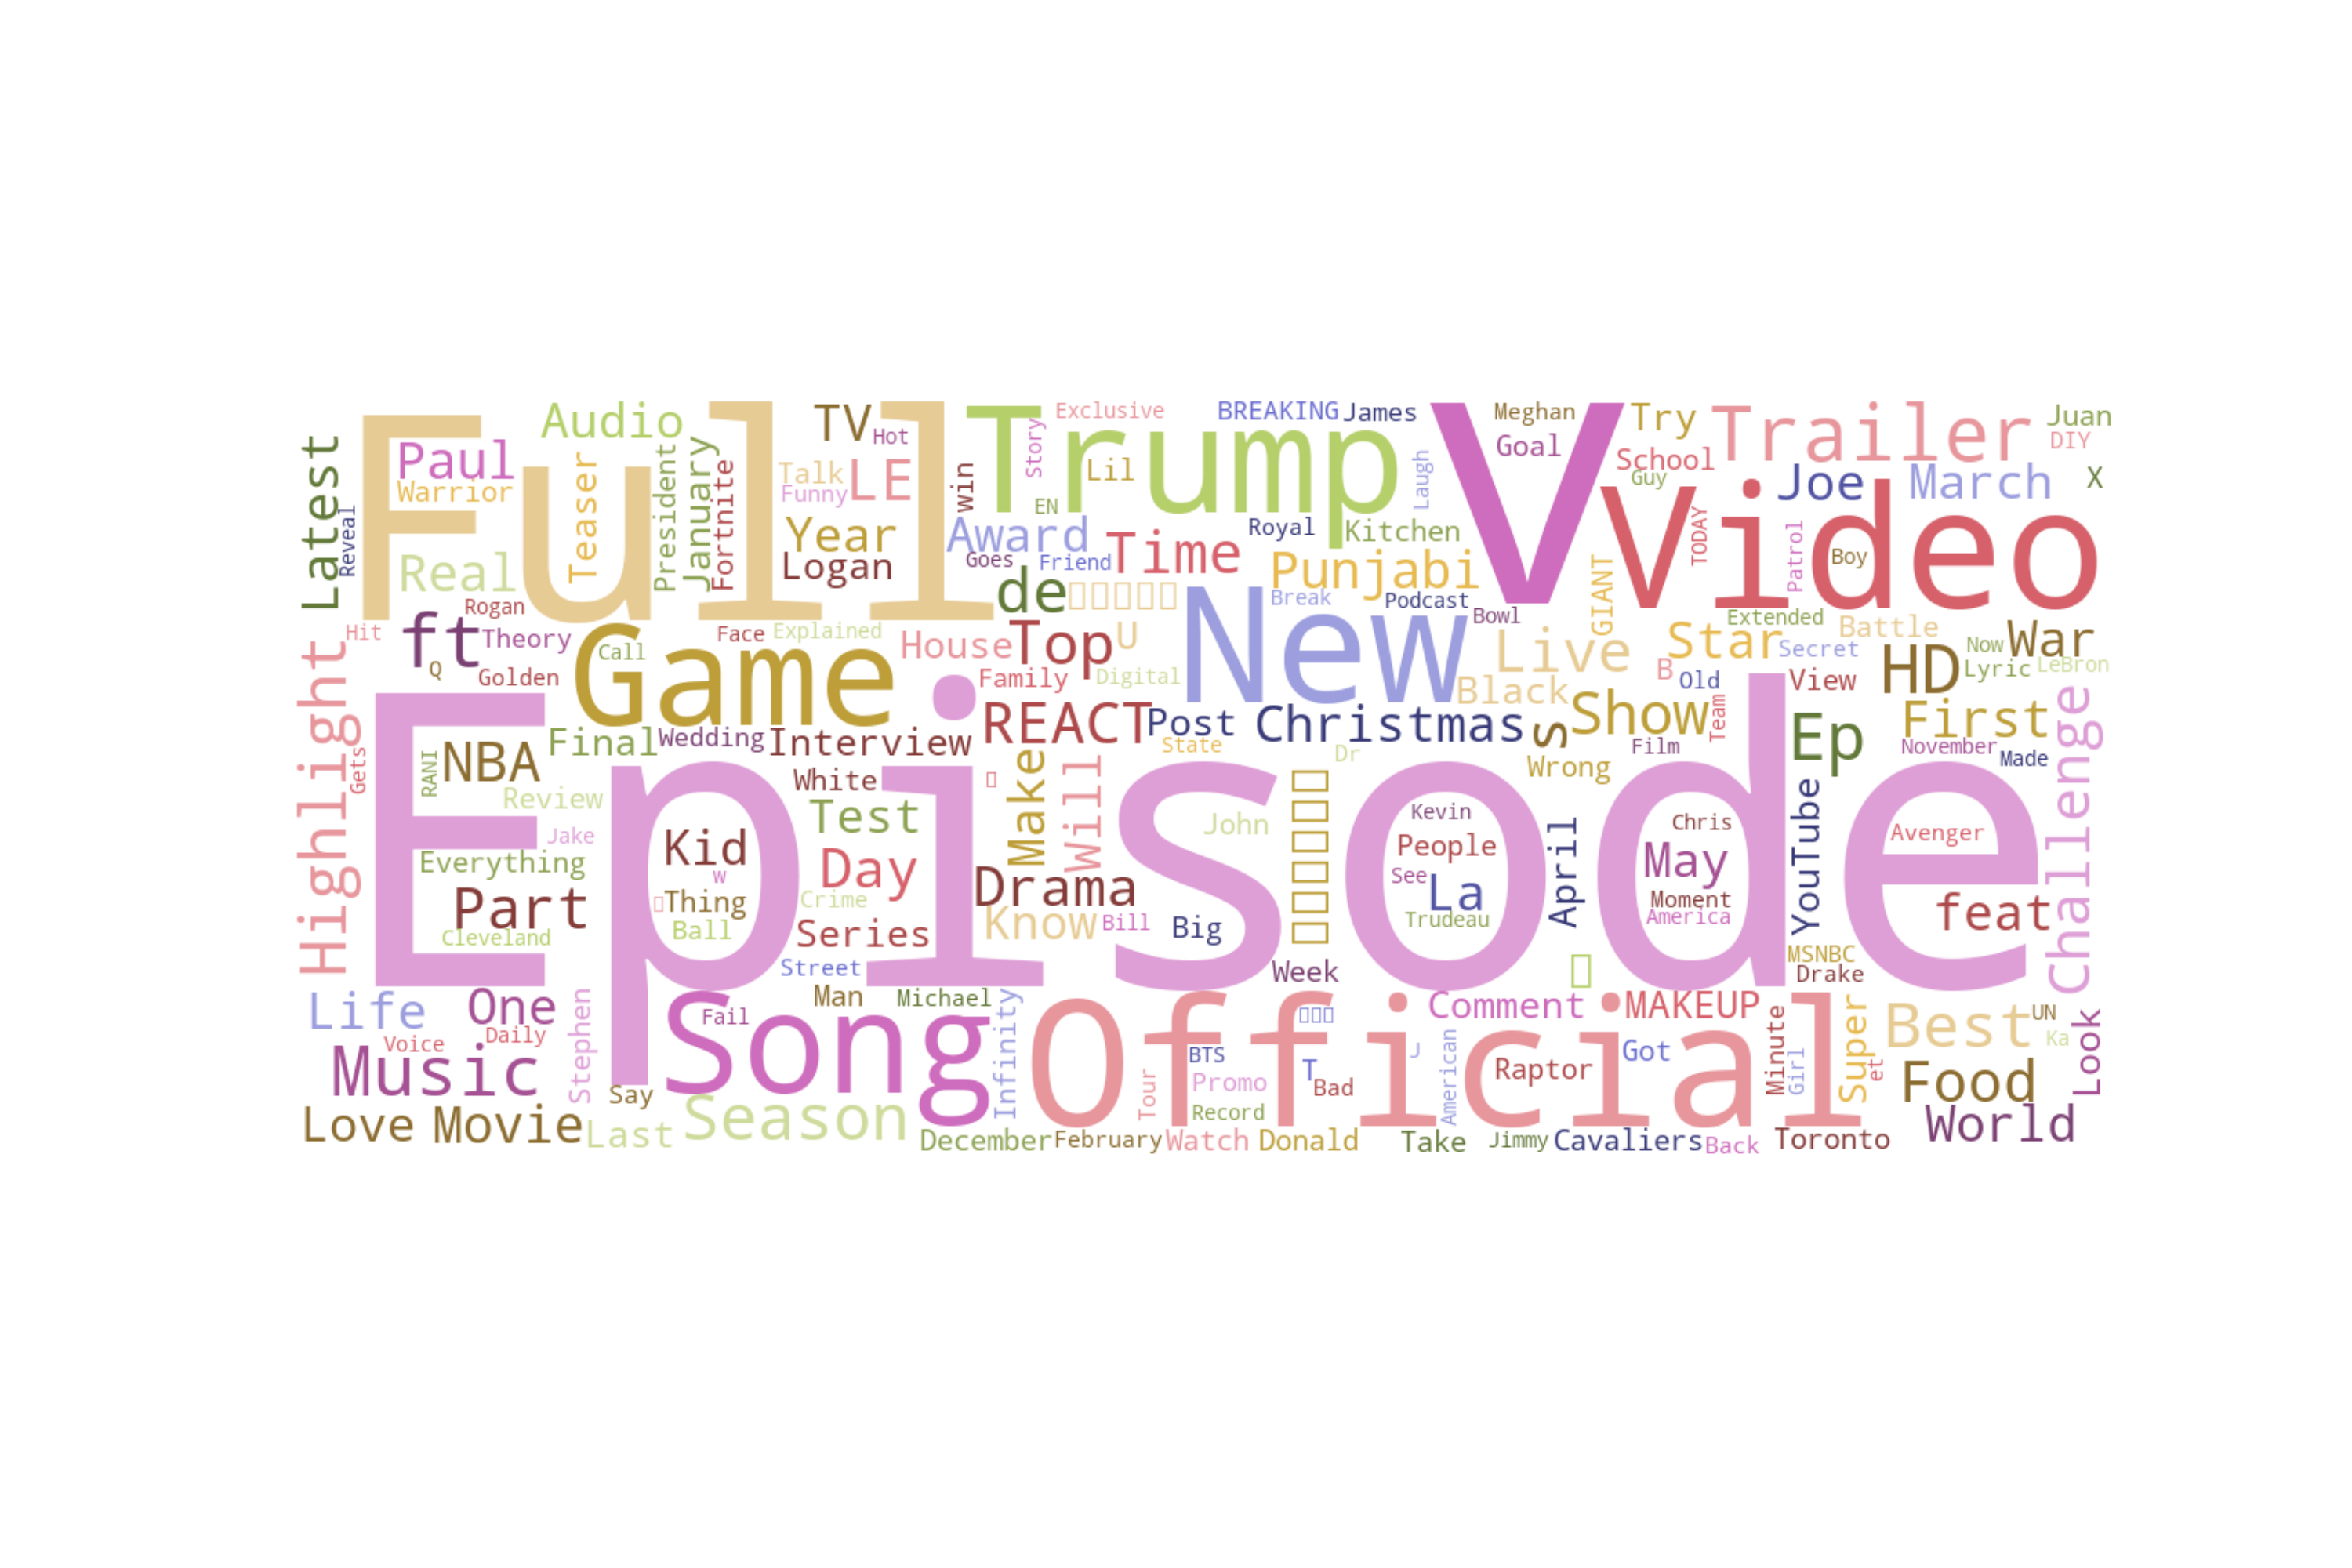

In [69]:
wc = wordcloud.WordCloud(width=1200, height=500, 
                         collocations=False, background_color="white", 
                         colormap="tab20b").generate(" ".join(title_words))
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
_ = plt.axis("off")

<IPython.core.display.Javascript object>


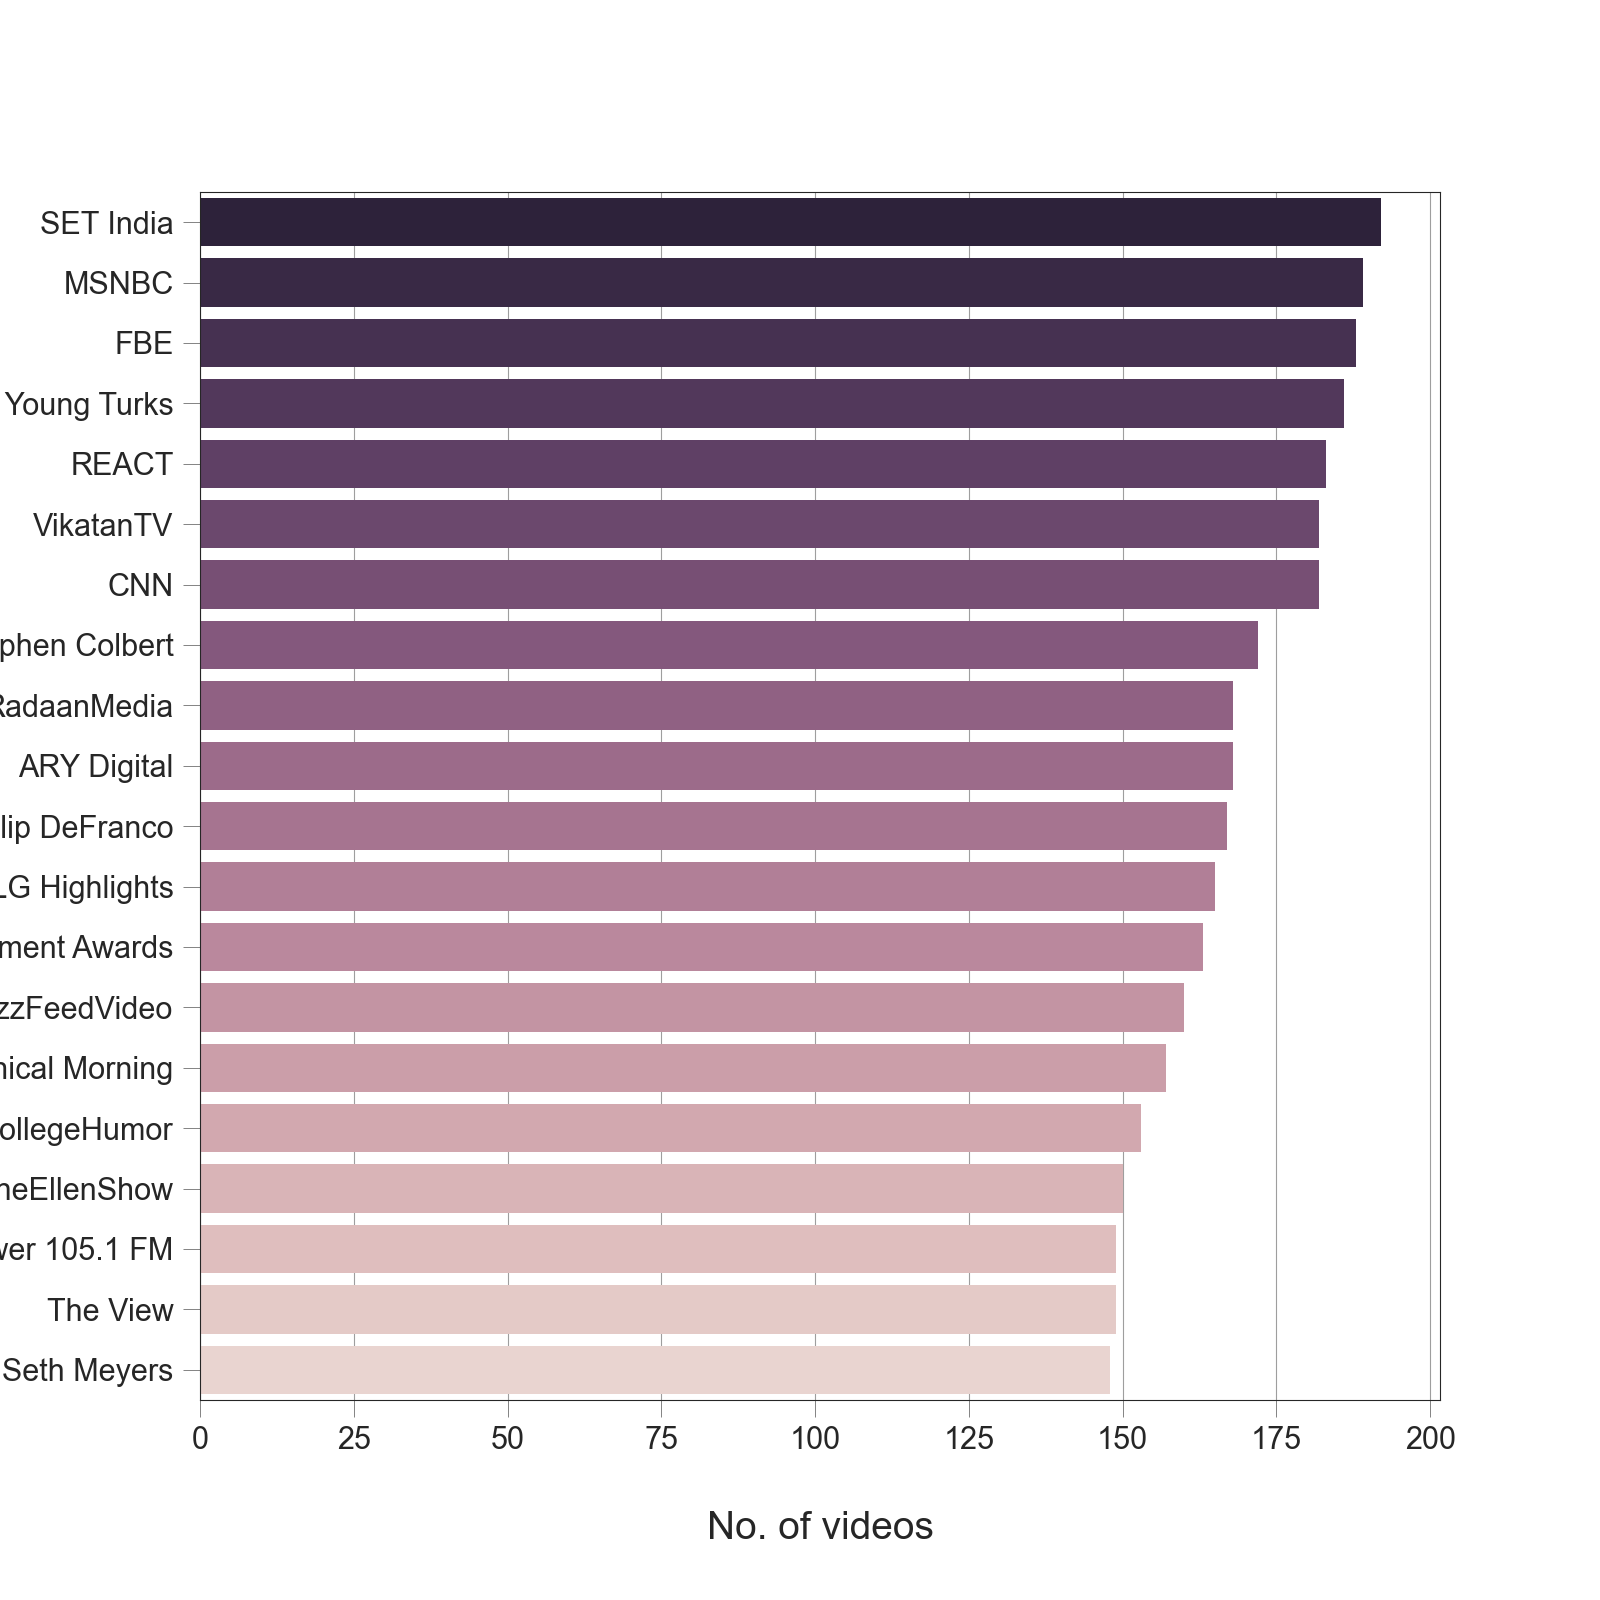

In [70]:
# 2、Which channels have the largest number of trending videos?
cdf = df.groupby("channel_title").size().reset_index(name="video_count") \
    .sort_values("video_count", ascending=False).head(20)

fig, ax = plt.subplots(figsize=(8,8))
_ = sns.barplot(x="video_count", y="channel_title", data=cdf,
                palette=sns.cubehelix_palette(n_colors=20, reverse=True), ax=ax)
_ = ax.set(xlabel="No. of videos", ylabel="Channel")

In [71]:
# 3、Which video category has the largest number of trending videos?
with open('/Users/zhujinghong/Downloads/5003 project/data/CA_category_id.json') as f:
    categories = json.load(f)["items"]
cat_dict = {}
for cat in categories:
    cat_dict[int(cat["id"])] = cat["snippet"]["title"]
df['category_name'] = df['category_id'].map(cat_dict)

<IPython.core.display.Javascript object>


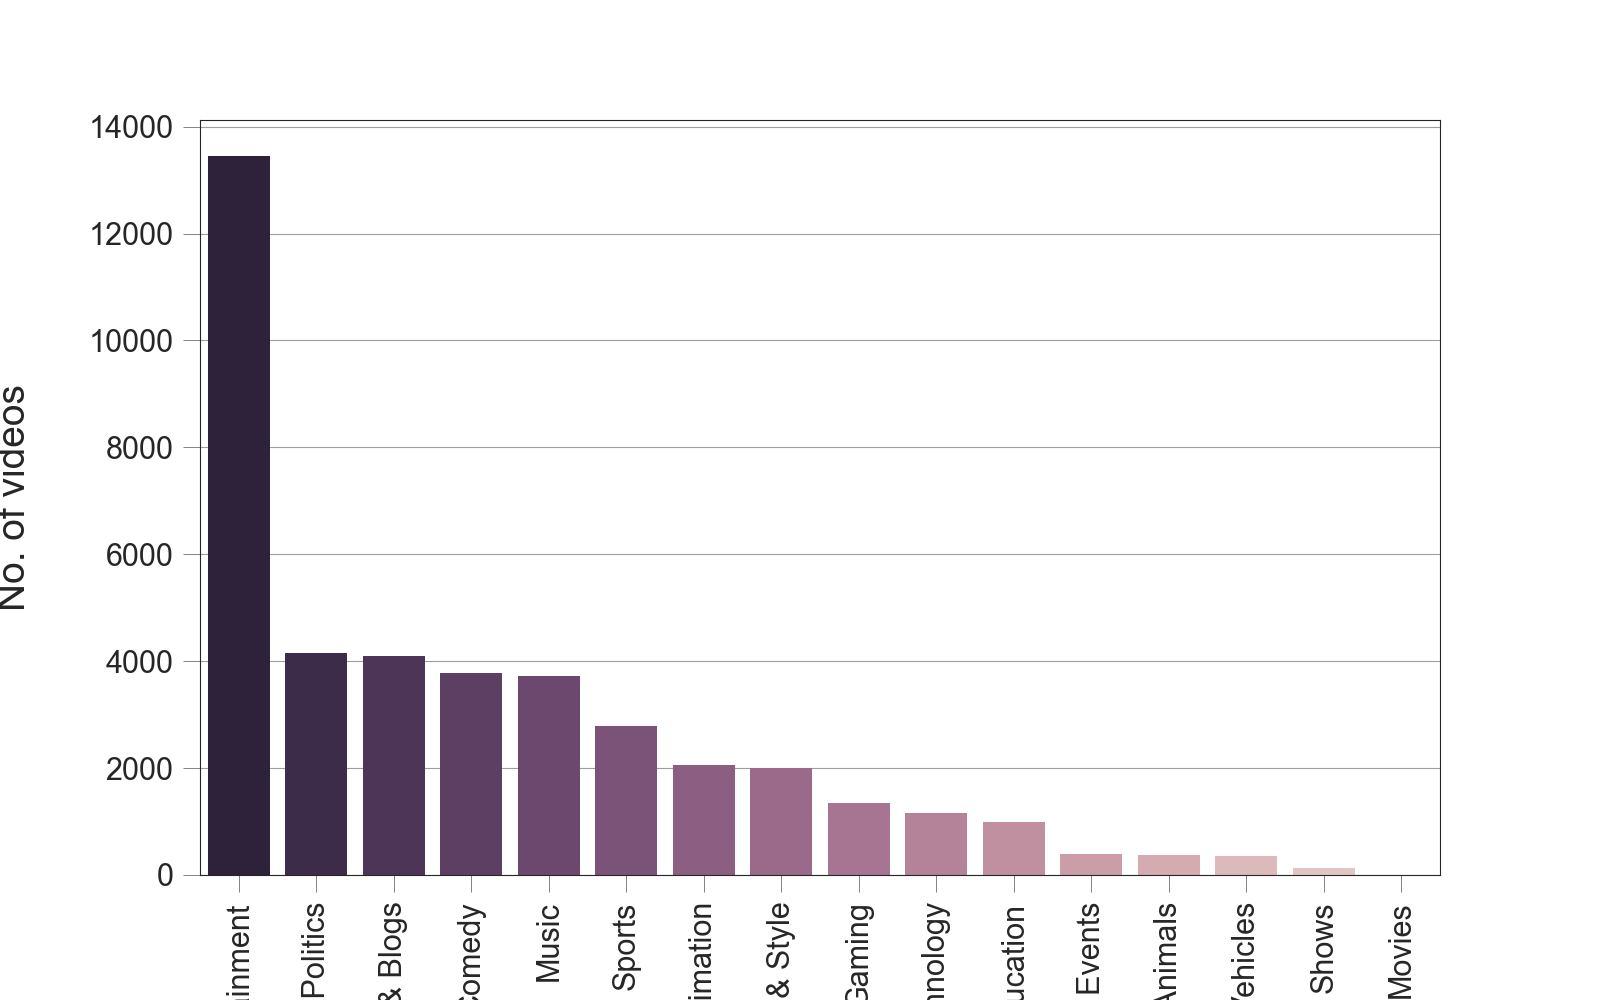

In [72]:
cdf = df["category_name"].value_counts().to_frame().reset_index()
cdf.rename(columns={"index": "category_name", "category_name": "No_of_videos"}, inplace=True)
fig, ax = plt.subplots()
_ = sns.barplot(x="category_name", y="No_of_videos", data=cdf, 
                palette=sns.cubehelix_palette(n_colors=16, reverse=True), ax=ax)
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(xlabel="Category", ylabel="No. of videos")

In [73]:
# 4、Trending videos and their publishing time
df["publishing_day"] = df["publish_time"].apply(
    lambda x: datetime.datetime.strptime(x[:10], "%Y-%m-%d").date().strftime('%a'))
df["publishing_hour"] = df["publish_time"].apply(lambda x: x[11:13])
df.drop(labels='publish_time', axis=1, inplace=True)

<IPython.core.display.Javascript object>


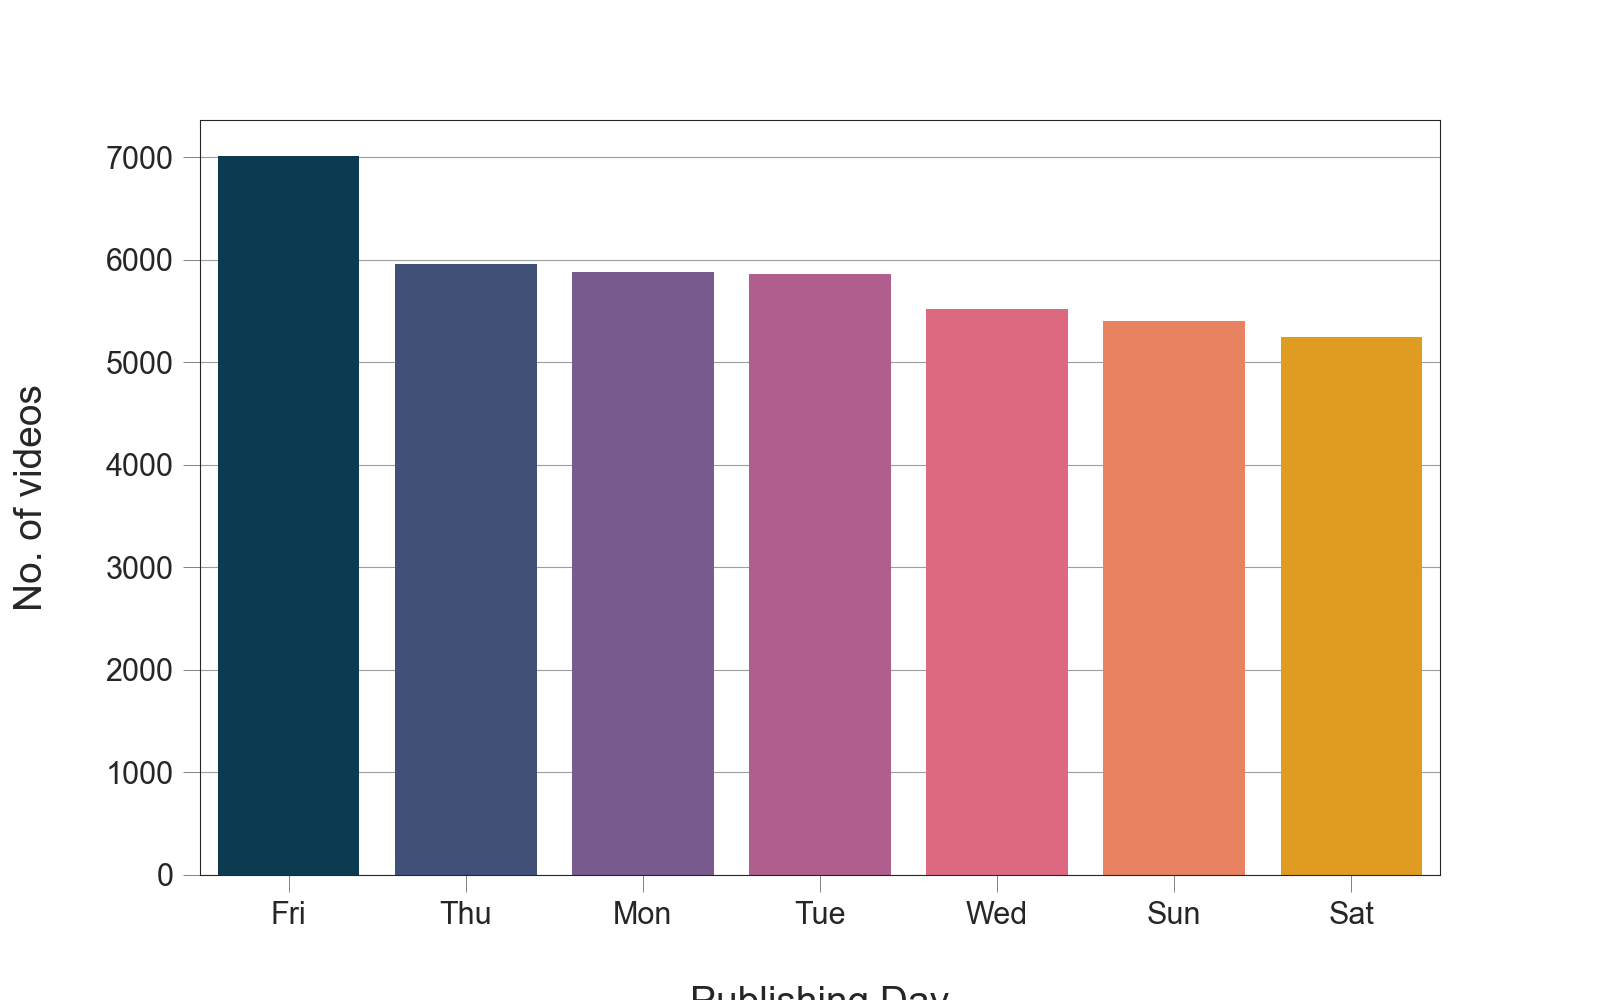

In [74]:
cdf = df["publishing_day"].value_counts()\
        .to_frame().reset_index().rename(columns={"index": "publishing_day", "publishing_day": "No_of_videos"})
fig, ax = plt.subplots()
_ = sns.barplot(x="publishing_day", y="No_of_videos", data=cdf, 
                palette=sns.color_palette(['#003f5c', '#374c80', '#7a5195', 
                                           '#bc5090', '#ef5675', '#ff764a', '#ffa600'], n_colors=7), ax=ax)
_ = ax.set(xlabel="Publishing Day", ylabel="No. of videos")

<IPython.core.display.Javascript object>


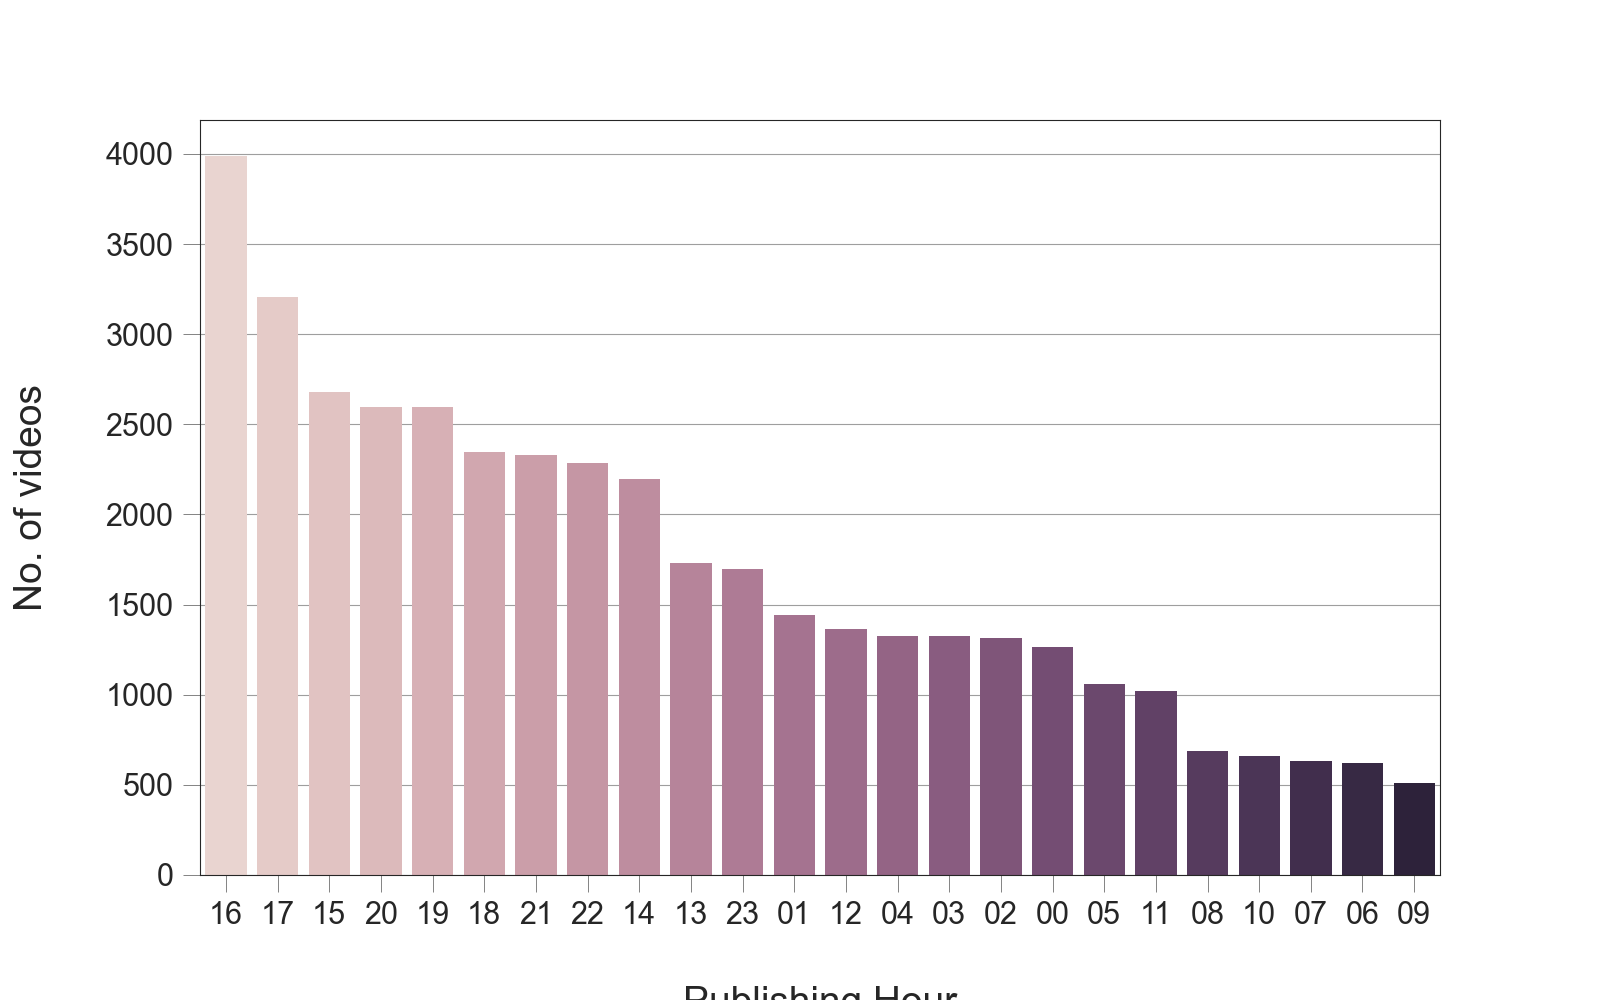

In [75]:
cdf = df["publishing_hour"].value_counts().to_frame().reset_index()\
        .rename(columns={"index": "publishing_hour", "publishing_hour": "No_of_videos"})
fig, ax = plt.subplots()
_ = sns.barplot(x="publishing_hour", y="No_of_videos", data=cdf, 
                palette=sns.cubehelix_palette(n_colors=24), ax=ax)
_ = ax.set(xlabel="Publishing Hour", ylabel="No. of videos")

<IPython.core.display.Javascript object>


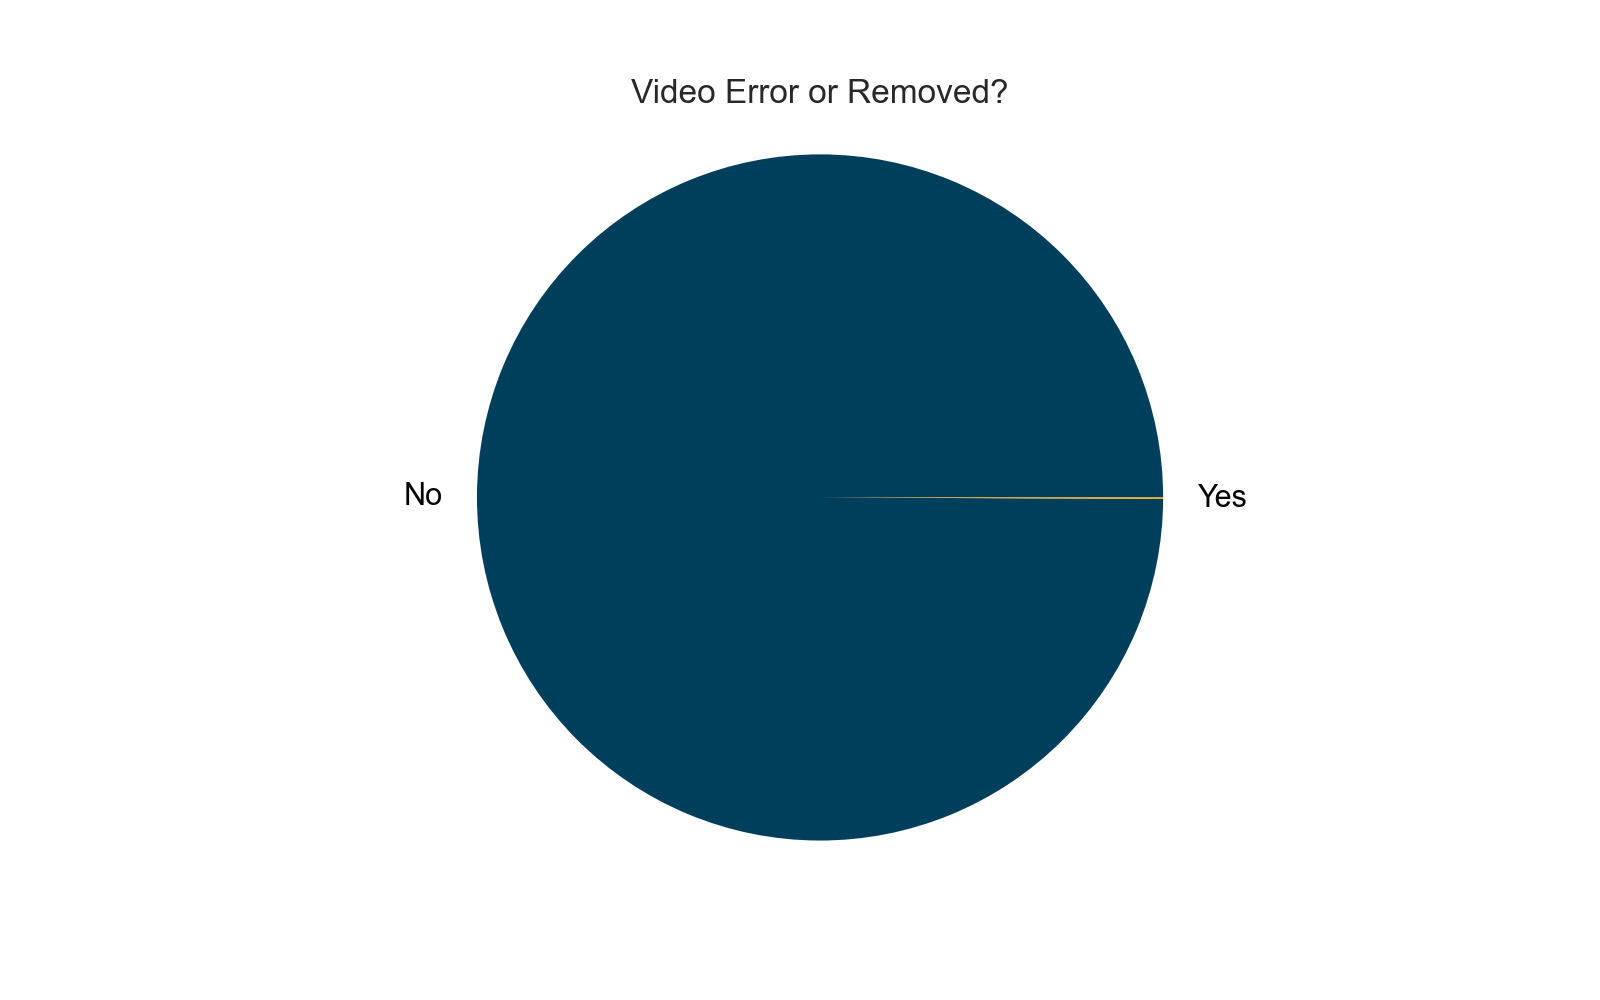

In [76]:
# 5、How many trending videos have an error?¶
value_counts = df["video_error_or_removed"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'], 
        colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'})
_ = ax.axis('equal')
_ = ax.set_title('Video Error or Removed?')

In [77]:
df["video_error_or_removed"].value_counts()

False    40854
True        27
Name: video_error_or_removed, dtype: int64

<IPython.core.display.Javascript object>


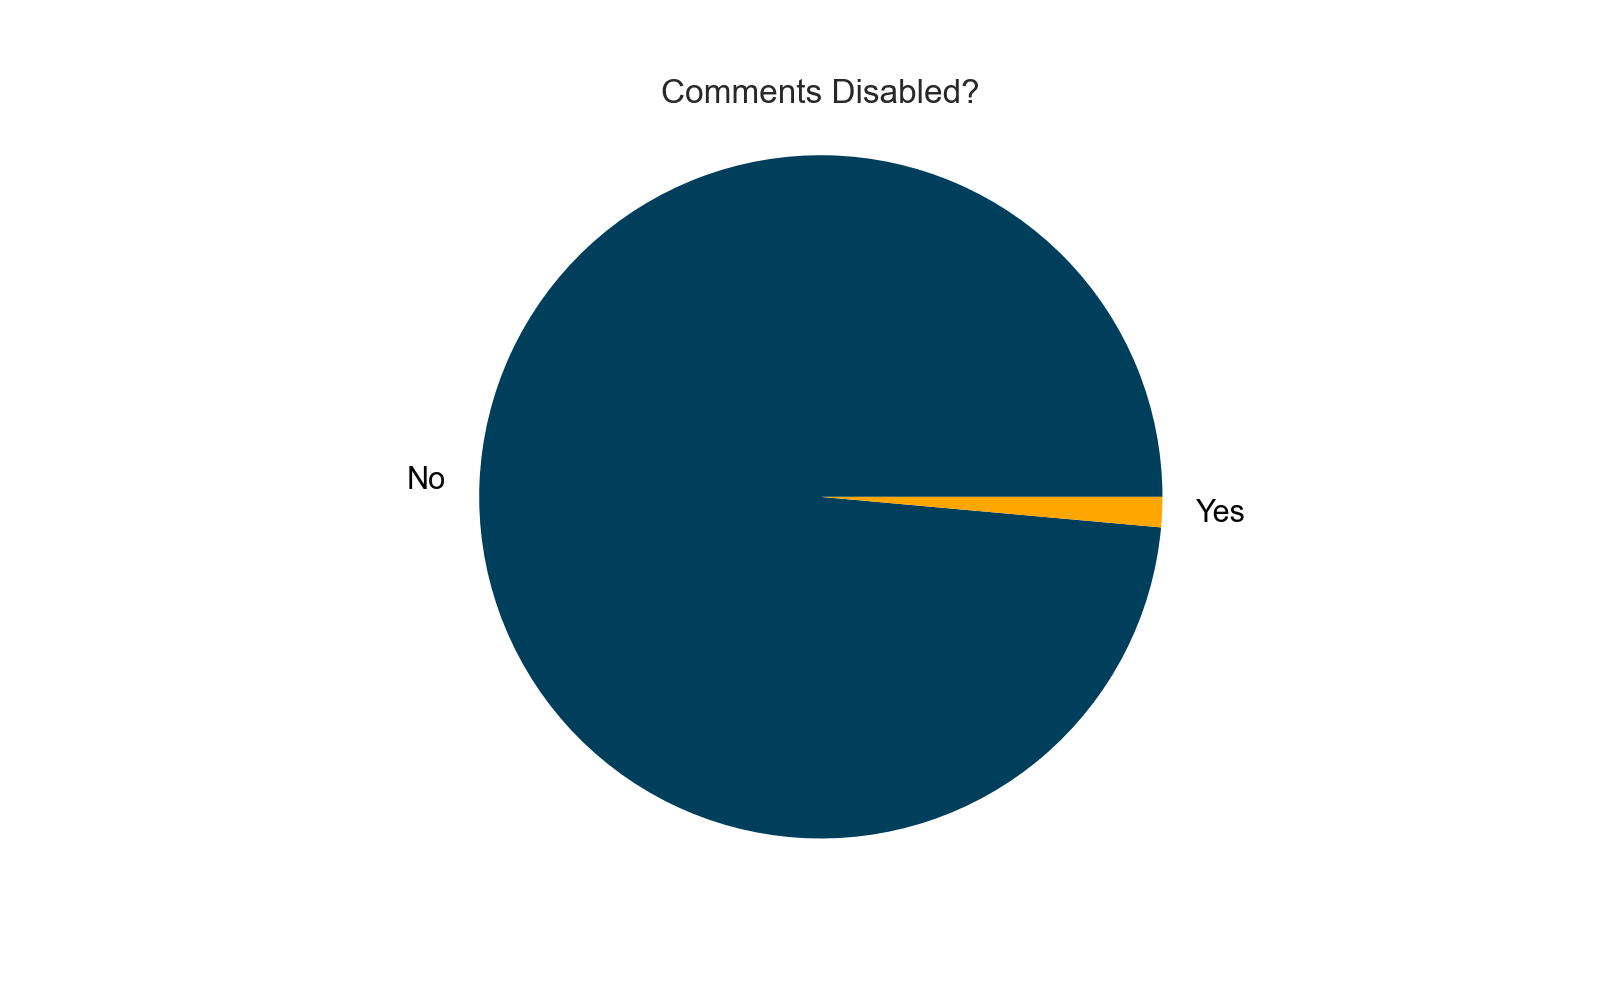

In [78]:
# 6、How many trending videos have their commets disabled?
value_counts = df["comments_disabled"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie(x=[value_counts[False], value_counts[True]], labels=['No', 'Yes'], 
           colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'})
_ = ax.axis('equal')
_ = ax.set_title('Comments Disabled?')

In [79]:
df["comments_disabled"].value_counts(normalize=True)

False   0.99
True    0.01
Name: comments_disabled, dtype: float64

<IPython.core.display.Javascript object>


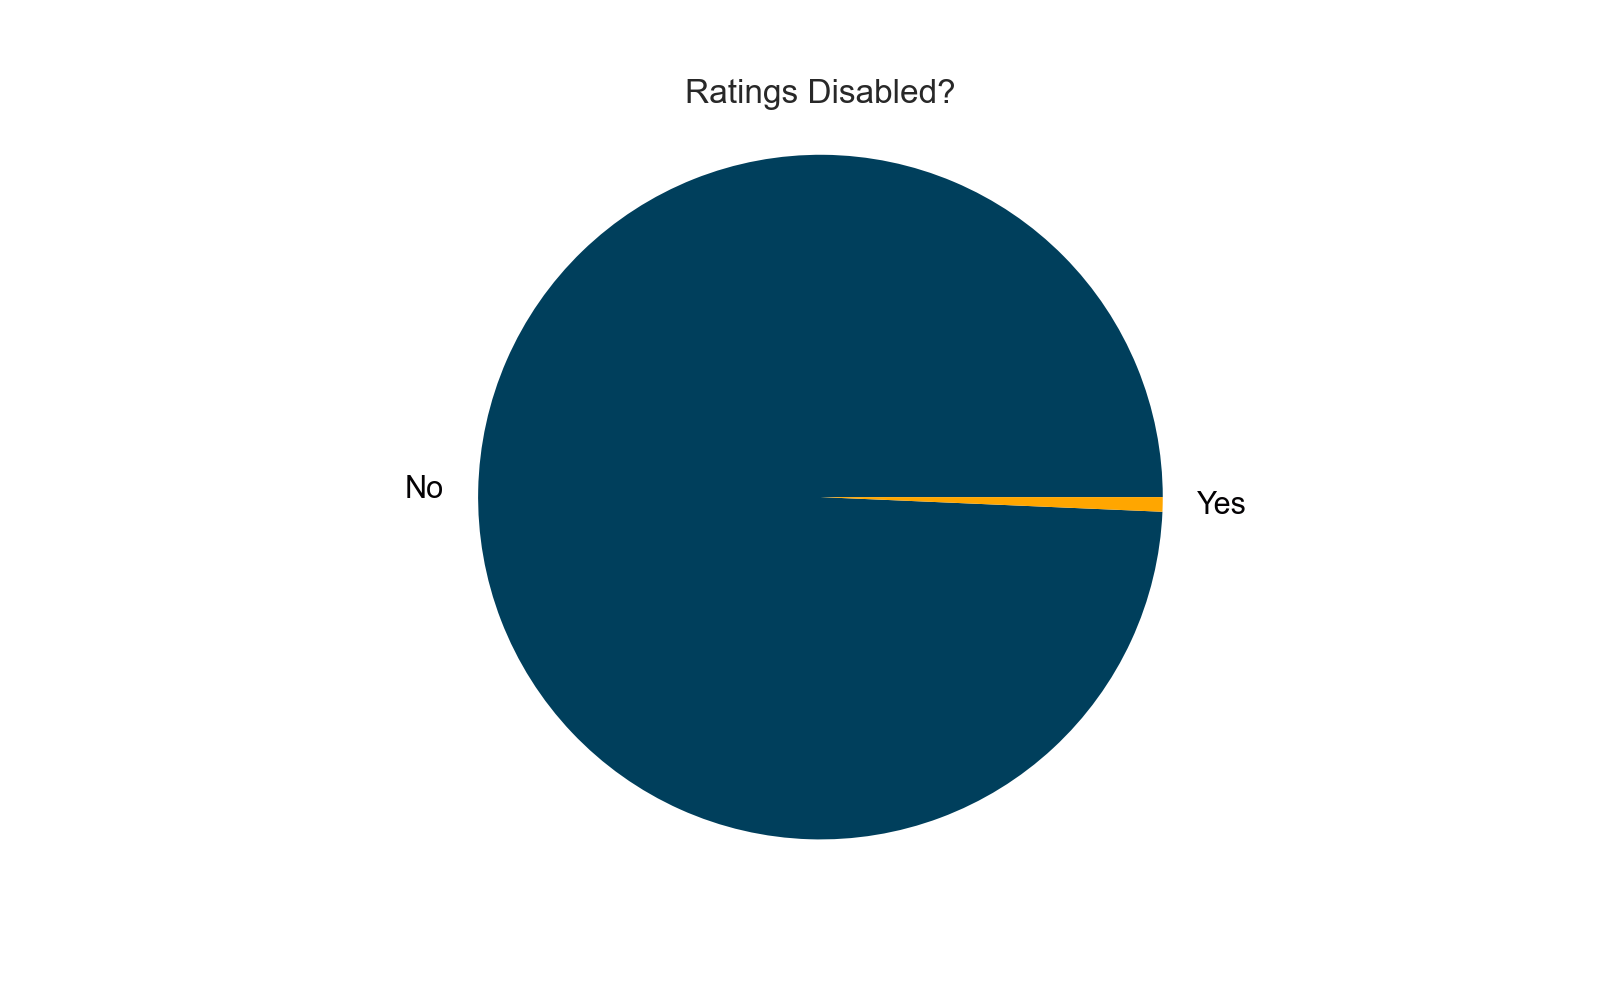

In [80]:
# 7、How many trending videos have their ratings disabled?
value_counts = df["ratings_disabled"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'], 
            colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'})
_ = ax.axis('equal')
_ = ax.set_title('Ratings Disabled?')

In [81]:
df["ratings_disabled"].value_counts()

False    40602
True       279
Name: ratings_disabled, dtype: int64

In [82]:
# 8、How many videos have both comments and ratings disabled?
len(df[(df["comments_disabled"] == True) & (df["ratings_disabled"] == True)].index)

63